In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.preprocessing import LabelEncoder , MultiLabelBinarizer , StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adadelta, Adagrad, Adamax, Nadam

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df =  pd.read_csv(r"C:\Users\lenovo\Desktop\koleya\level3 term 2\Ai platforms\project\Career_Assessment_project_AI_platform.csv")

In [4]:
df.drop(columns=['طابع زمني','Full Name'], inplace=True)
df.head()

Major(your college)   
0  (حاسبات و معلومات)computer science  \
1  (حاسبات و معلومات)computer science   
2  (حاسبات و معلومات)computer science   
3  (حاسبات و معلومات)computer science   
4  (حاسبات و معلومات)computer science   

                     Activities (Choose one or more)   
0  Do routine, organized, and accurate work(القيا...  \
1  (تكييف للتغيير أو أداء مجموعة متنوعة من الواجب...   
2  Budget and handle money and records with accur...   
3  (تكييف للتغيير أو أداء مجموعة متنوعة من الواجب...   
4  (تكييف للتغيير أو أداء مجموعة متنوعة من الواجب...   

      What would describe you?  (Choose one or more)   
0  (إقناع الناس بشراء المنتجات أو المشاركة في الأ...  \
1  (اتخاذ القرارات بناءً على الملاحظات) Make deci...   
2  (إقناع الناس بشراء المنتجات أو المشاركة في الأ...   
3  (اتخاذ القرارات بناءً على الملاحظات) Make deci...   
4  (إنشاء عروض بصرية لتعزيز الأفكار) Make visual ...   

                   Activities (Choose one or more).1   
0  (الاستفادة من الفرص لكسب المال الإضافي) Take a...  \
1  (الاستفادة من الفرص لكسب المال الإضافي) Take a...   
2  (الاستفادة من الفرص لكسب المال الإضافي) Take a...   
3  (حضور فصول دراسية أو ورش عمل) Take classes or ...   
4  (حضور فصول دراسية أو ورش عمل) Take classes or ...   

       (Choose one or more)  Identify your character   
0  مهتم بالآخرين (Caring);منافس (Competitive);مبد...  \
1  مغامر (Adventurous);منافس (Competitive);صانع ق...   
2  مهتم بالآخرين (Caring);مبدع وخيالي(Creative an...   
3  مهتم بالآخرين (Caring);ودود (Friendly);متواصل ...   
4  مغامر (Adventurous);مهتم بالآخرين (Caring);ودو...   

                (Choose one or more) personal traits   
0  غير مادي (Non-materialistic);منظم (Organized);...  \
1  غير متحيز (Non-judgmental);غير مادي (Non-mater...   
2  غير متحيز (Non-judgmental);متفائل (Optimistic)...   
3  غير متحيز (Non-judgmental);غير مادي (Non-mater...   
4  غير متحيز (Non-judgmental);متفائل (Optimistic)...   

            Personal Qualities  (Choose one or more)   
0  حساس للتصرف (Tactful);موثوق به (Trustworthy);ي...  \
1  يستخدم الحدس والمنطق (Uses intuition and logic...   
2  موثوق به (Trustworthy);يستخدم الحدس والمنطق (U...   
3  موثوق به (Trustworthy);يستخدم الحدس والمنطق (U...   
4  متحفز ذاتيًا (Self-motivated);موثوق به (Trustw...   

  I get stressed out easily Favorite School Subjects  (Choose one or more)  
0                       Yes                                           Math  
1                       Yes              Computer;Physics;Foreign Language  
2                       Yes                          Biology;Computer;Math  
3                       Yes                               Computer;Physics  
4                        No                               Computer;Physics

In [5]:
def remove_arabic(text):
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+')
    parentheses_pattern = re.compile(r'[()]')
    text = arabic_pattern.sub('', text)
    text = parentheses_pattern.sub('', text)
    return text


df = df.applymap(remove_arabic)
df 
data = df
data


Major(your college)                    Activities (Choose one or more)   
0      computer science  Do routine, organized, and accurate work    ; ...  \
1      computer science            Adapt to change or perform a variety...   
2      computer science  Budget and handle money and records with accur...   
3      computer science            Adapt to change or perform a variety...   
4      computer science            Adapt to change or perform a variety...   
..                  ...                                                ...   
119       sport science           Help people overcome their challenges...   
120       sport science  Do routine, organized, and accurate work    ; ...   
121    computer science  Budget and handle money and records with accur...   
122             Medical  Do routine, organized, and accurate work    ; ...   
123         Engineering            Handle several responsibilities at once   

        What would describe you?  (Choose one or more)   
0            Persuade people to buy products or to ...  \
1         Make decisions based on observations;    ...   
2            Persuade people to buy products or to ...   
3         Make decisions based on observations;   L...   
4         Make visual displays to promote ideas;   ...   
..                                                 ...   
119                             Learn and study sports   
120          Learn how things grow and stay alive; ...   
121       Make decisions based on observations;    ...   
122                             Learn and study sports   
123               Learn how things grow and stay alive   

                     Activities (Choose one or more).1   
0          Take advantage of opportunities to make ...  \
1          Take advantage of opportunities to make ...   
2          Take advantage of opportunities to make ...   
3          Take classes or workshops;         Use l...   
4          Take classes or workshops;         Use l...   
..                                                 ...   
119        Take advantage of opportunities to make ...   
120           Use logic and information to make dec...   
121        Take advantage of opportunities to make ...   
122        Take advantage of opportunities to make ...   
123        Take advantage of opportunities to make ...   

         (Choose one or more)  Identify your character   
0      Caring; Competitive; Creative and imaginativ...  \
1     Adventurous; Competitive;  Decision maker;  G...   
2           Caring; Creative and imaginative; Friendly   
3                 Caring; Friendly;  Good communicator   
4     Adventurous;  Caring; Friendly;  Good communi...   
..                                                 ...   
119               Caring; Friendly;  Good communicator   
120                                        Competitive   
121                                           Friendly   
122          Competitive; Friendly;  Good communicator   
123                                           Friendly   

                  (Choose one or more) personal traits   
0      Non-materialistic; Organized;   Pay attentio...  \
1      Non-judgmental;  Non-materialistic; Organize...   
2                Non-judgmental; Optimistic; Organized   
3      Non-judgmental;  Non-materialistic; Optimist...   
4      Non-judgmental; Optimistic;   Pay attention ...   
..                                                 ...   
119     Pay attention to detail;     See details in...   
120            Optimistic; Persuasive;  Self-confident   
121                                     Non-judgmental   
122                             Optimistic; Persuasive   
123                                         Persuasive   

              Personal Qualities  (Choose one or more)   
0      Tactful;  Trustworthy;   Uses intuition and ...  \
1             Uses intuition and logic;   Self-reliant   
2      Trustworthy;   Uses intuition and logic;   S...   
3      Trustworthy;   Uses intuition and logic;

In [6]:
y = df["Major(your college)"]
x = df
x.drop(columns=["Major(your college)"], inplace=True)

In [7]:
d = pd.merge(x, y, left_index=True, right_index=True)

In [8]:
x

Activities (Choose one or more)   
0    Do routine, organized, and accurate work    ; ...  \
1              Adapt to change or perform a variety...   
2    Budget and handle money and records with accur...   
3              Adapt to change or perform a variety...   
4              Adapt to change or perform a variety...   
..                                                 ...   
119           Help people overcome their challenges...   
120  Do routine, organized, and accurate work    ; ...   
121  Budget and handle money and records with accur...   
122  Do routine, organized, and accurate work    ; ...   
123            Handle several responsibilities at once   

        What would describe you?  (Choose one or more)   
0            Persuade people to buy products or to ...  \
1         Make decisions based on observations;    ...   
2            Persuade people to buy products or to ...   
3         Make decisions based on observations;   L...   
4         Make visual displays to promote ideas;   ...   
..                                                 ...   
119                             Learn and study sports   
120          Learn how things grow and stay alive; ...   
121       Make decisions based on observations;    ...   
122                             Learn and study sports   
123               Learn how things grow and stay alive   

                     Activities (Choose one or more).1   
0          Take advantage of opportunities to make ...  \
1          Take advantage of opportunities to make ...   
2          Take advantage of opportunities to make ...   
3          Take classes or workshops;         Use l...   
4          Take classes or workshops;         Use l...   
..                                                 ...   
119        Take advantage of opportunities to make ...   
120           Use logic and information to make dec...   
121        Take advantage of opportunities to make ...   
122        Take advantage of opportunities to make ...   
123        Take advantage of opportunities to make ...   

         (Choose one or more)  Identify your character   
0      Caring; Competitive; Creative and imaginativ...  \
1     Adventurous; Competitive;  Decision maker;  G...   
2           Caring; Creative and imaginative; Friendly   
3                 Caring; Friendly;  Good communicator   
4     Adventurous;  Caring; Friendly;  Good communi...   
..                                                 ...   
119               Caring; Friendly;  Good communicator   
120                                        Competitive   
121                                           Friendly   
122          Competitive; Friendly;  Good communicator   
123                                           Friendly   

                  (Choose one or more) personal traits   
0      Non-materialistic; Organized;   Pay attentio...  \
1      Non-judgmental;  Non-materialistic; Organize...   
2                Non-judgmental; Optimistic; Organized   
3      Non-judgmental;  Non-materialistic; Optimist...   
4      Non-judgmental; Optimistic;   Pay attention ...   
..                                                 ...   
119     Pay attention to detail;     See details in...   
120            Optimistic; Persuasive;  Self-confident   
121                                     Non-judgmental   
122                             Optimistic; Persuasive   
123                                         Persuasive   

              Personal Qualities  (Choose one or more)   
0      Tactful;  Trustworthy;   Uses intuition and ...  \
1             Uses intuition and logic;   Self-reliant   
2      Trustworthy;   Uses intuition and logic;   S...   
3      Trustworthy;   Uses intuition and logic;   S...   
4      Self-motivated;  Trustworthy;   Uses intuiti...   
..                                                 ...   
119              Tactful;  Trustworthy;   Self-reliant   
120                           Uses intuition and logic   
121        Self-

In [9]:
y

0        computer science
1        computer science
2        computer science
3        computer science
4        computer science
              ...        
119         sport science
120         sport science
121      computer science
122               Medical
123           Engineering
Name: Major(your college), Length: 124, dtype: object

In [10]:
x["Activities (Choose one or more)"][0]

'Do routine, organized, and accurate work    ;         Find the best way or a new way to do something'

In [11]:
mlb = MultiLabelBinarizer()

for column in x.columns:
    categories_list = x[column].str.split(';').tolist()
    one_hot_encoded = mlb.fit_transform(categories_list)
    new_columns = [f'{class_name}' for class_name in mlb.classes_]
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_columns)
    x = pd.concat([x, one_hot_df], axis=1)
    x.drop(column, axis=1, inplace=True)

In [12]:
x.head()

Adapt to change or perform a variety of duties that may change   
0                                                  0                         \
1                                                  1                          
2                                                  0                          
3                                                  1                          
4                                                  1                          

            Find the best way or a new way to do something   
0                                                  1        \
1                                                  0         
2                                                  0         
3                                                  1         
4                                                  0         

            Help people overcome their challenges to be at their best   
0                                                  0                   \
1                                                  0                    
2                                                  0                    
3                                                  1                    
4                                                  0                    

         Handle several responsibilities at once   
0                                              0  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   

        Concentrate for long periods without being distracted   
0                                                  0           \
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  1            

       Have a flexible schedule   
0                             0  \
1                             1   
2                             0   
3                             0   
4                             0   

   Budget and handle money and records with accuracy and reliability     .   
0                                                  0                        \
1                                                  0                         
2                                                  1                         
3                                                  0                         
4                                                  0                         

   Care about people, their needs, and their problems      
0                                                  0      \
1                                                  0       
2                                                  1       
3                                                  1       
4                                                  1       

   Do routine, organized, and accurate work      Explore new technology     
0                                             1                         0  \
1                                             0                         1   
2                                             0                         0   
3                                             1                         1   
4                                             1                         0   

   ...  No  Yes  Biology  Chemistry  Computer  Foreign Language  Geography   
0  ...   0    1        0          0         0                 0          0  \
1  ...   0    1        0          0         1                 1          0   
2  ...   0    1        1          0         1                 0          0   
3  ...   0    1        0          0         1                 0          0   
4  ...   1    0        0          0         1                 0          0   

   History  Math  Physics  
0        0     1     

In [13]:
x.columns

Index(['          Adapt to change or perform a variety of duties that may change',
       '         Find the best way or a new way to do something',
       '         Help people overcome their challenges to be at their best',
       '      Handle several responsibilities at once',
       '     Concentrate for long periods without being distracted',
       '    Have a flexible schedule',
       'Budget and handle money and records with accuracy and reliability     .',
       'Care about people, their needs, and their problems   ',
       'Do routine, organized, and accurate work    ',
       'Explore new technology  ',
       '        Attend health and science classes or workshops',
       '        Learn how things grow and stay alive',
       '        Persuade people to buy products or to participate in activities',
       '     Make business contact with people',
       '     Make decisions based on observations',
       '     Make visual displays to promote ideas',
       '   Learn a

In [14]:
x.drop(columns=[' 8  Self-confident','No'], inplace=True)

In [15]:
# Merge df_x and df_y based on their indices
data = pd.merge(x, y, left_index=True, right_index=True)
data2 = pd.merge(x, y, left_index=True, right_index=True)

data.head()

Adapt to change or perform a variety of duties that may change   
0                                                  0                         \
1                                                  1                          
2                                                  0                          
3                                                  1                          
4                                                  1                          

            Find the best way or a new way to do something   
0                                                  1        \
1                                                  0         
2                                                  0         
3                                                  1         
4                                                  0         

            Help people overcome their challenges to be at their best   
0                                                  0                   \
1                                                  0                    
2                                                  0                    
3                                                  1                    
4                                                  0                    

         Handle several responsibilities at once   
0                                              0  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   

        Concentrate for long periods without being distracted   
0                                                  0           \
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  1            

       Have a flexible schedule   
0                             0  \
1                             1   
2                             0   
3                             0   
4                             0   

   Budget and handle money and records with accuracy and reliability     .   
0                                                  0                        \
1                                                  0                         
2                                                  1                         
3                                                  0                         
4                                                  0                         

   Care about people, their needs, and their problems      
0                                                  0      \
1                                                  0       
2                                                  1       
3                                                  1       
4                                                  1       

   Do routine, organized, and accurate work      Explore new technology     
0                                             1                         0  \
1                                             0                         1   
2                                             0                         0   
3                                             1                         1   
4                                             1                         0   

   ...  Yes  Biology  Chemistry  Computer  Foreign Language  Geography   
0  ...    1        0          0         0                 0          0  \
1  ...    1        0          0         1                 1          0   
2  ...    1        1          0         1                 0          0   
3  ...    1        0          0         1                 0          0   
4  ...    0        0          0         1                 0          0   

   History  Math  Physics  Major(your college)  
0        0     1        

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 58 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0             Adapt to change or perform a variety of duties that may change        124 non-null    int32 
 1            Find the best way or a new way to do something                         124 non-null    int32 
 2            Help people overcome their challenges to be at their best              124 non-null    int32 
 3         Handle several responsibilities at once                                   124 non-null    int32 
 4        Concentrate for long periods without being distracted                      124 non-null    int32 
 5       Have a flexible schedule                                                    124 non-null    int32 
 6   Budget and handle money an

In [17]:
data.describe()

Adapt to change or perform a variety of duties that may change   
count                                         124.000000                         \
mean                                            0.250000                          
std                                             0.434769                          
min                                             0.000000                          
25%                                             0.000000                          
50%                                             0.000000                          
75%                                             0.250000                          
max                                             1.000000                          

                Find the best way or a new way to do something   
count                                         124.000000        \
mean                                            0.564516         
std                                             0.497832         
min                                             0.000000         
25%                                             0.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

                Help people overcome their challenges to be at their best   
count                                         124.000000                   \
mean                                            0.282258                    
std                                             0.451924                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             1.000000                    
max                                             1.000000                    

             Handle several responsibilities at once   
count                                     124.000000  \
mean                                        0.427419   
std                                         0.496711   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         1.000000   

            Concentrate for long periods without being distracted   
count                                         124.000000           \
mean                                            0.177419            
std                                             0.383573            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                             1.000000            

           Have a flexible schedule   
count                    124.000000  \
mean                       0.411290   
std                        0.494064   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        1.000000   
max                        1.000000   

       Budget and handle money and records with accuracy and reliability     .   
count                                         124.000000                        \
mean                                            0.250000                         
std                                             0.434769                         
min                                             0.000000                         
25%                                             0.000000                         
50%      

# *Plots* #

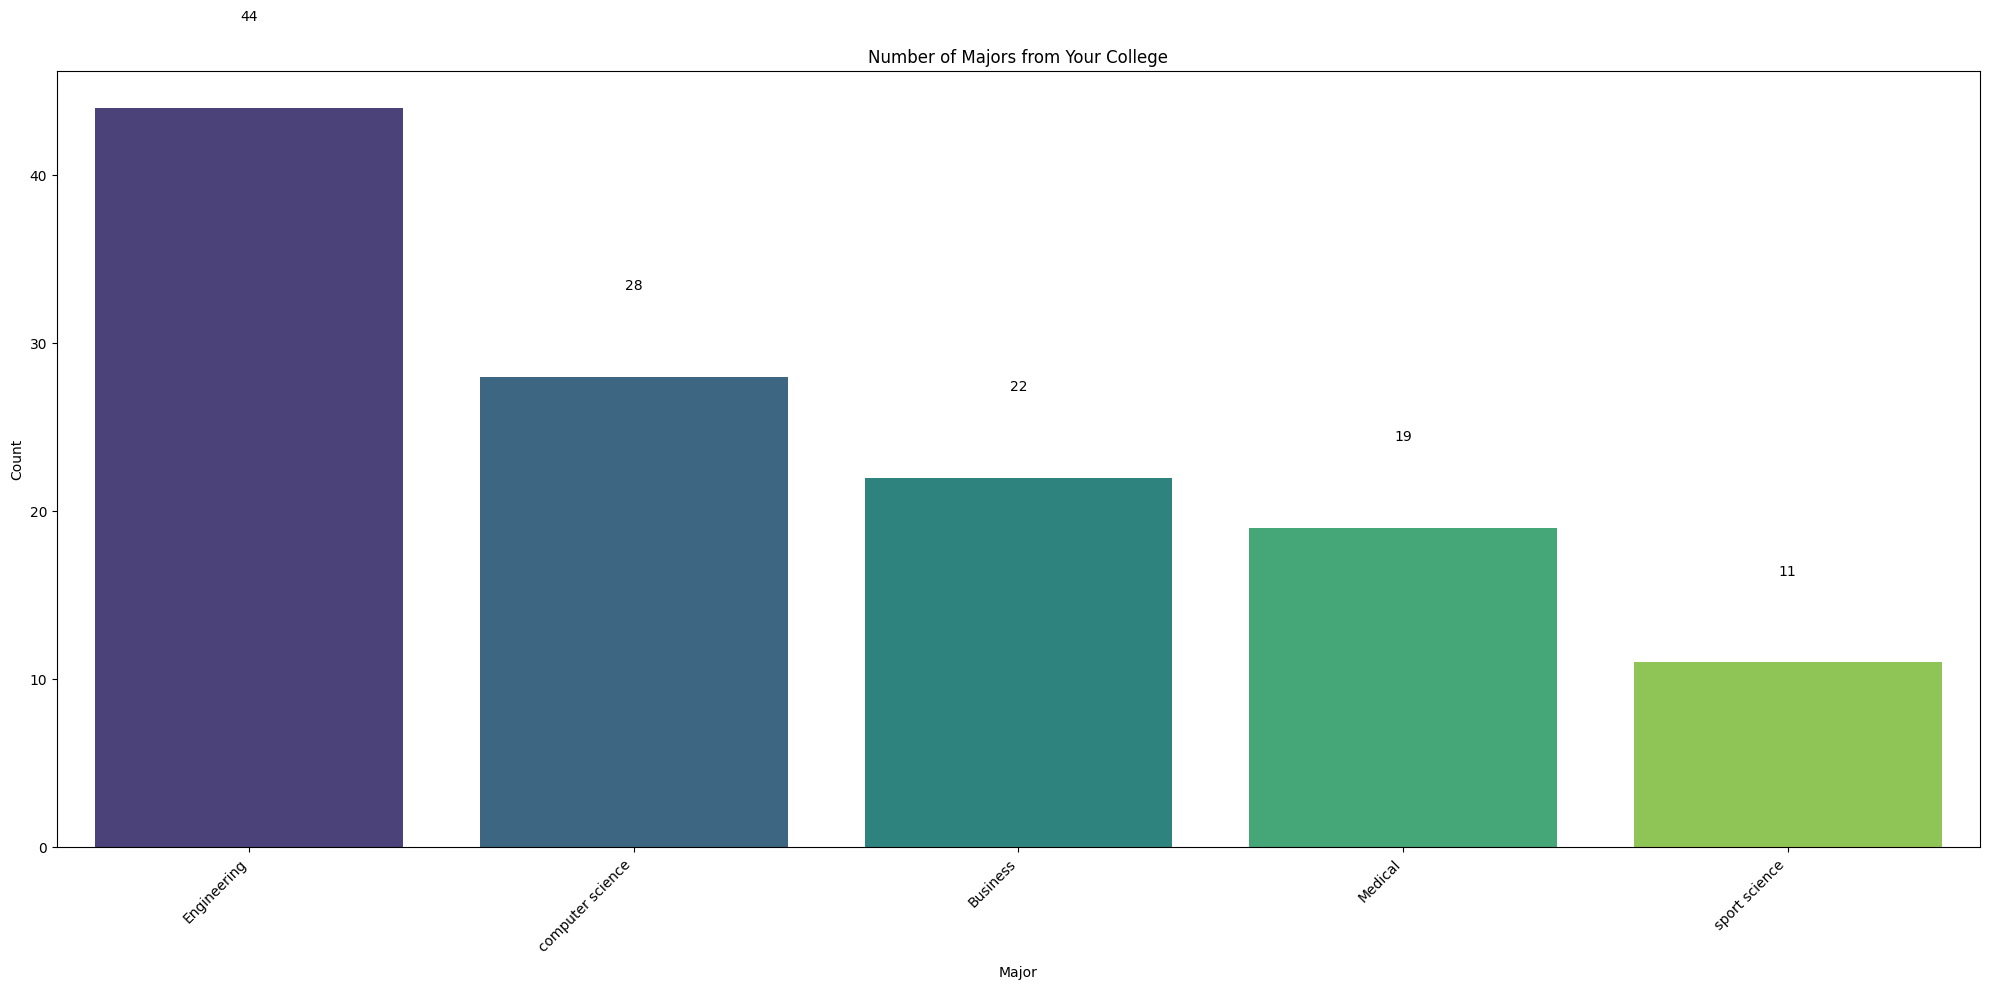

In [18]:
# Count the number of occurrences for each major
major_counts = data.iloc[:, -1].value_counts()

# Plotting the count plot with annotations
plt.figure(figsize=(20, 10))
sns.countplot(x=data.iloc[:, -1], data=data, order=major_counts.index, palette='viridis')
plt.title('Number of Majors from Your College')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add annotations with count values on top of the bars
for index, value in enumerate(major_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

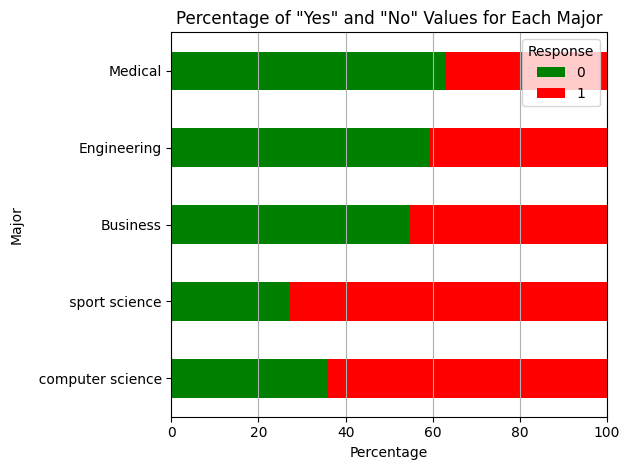

In [19]:
# Group by 'Major(your college)' and count 'Yes' and 'No' values for each major
grouped_counts = data2.groupby(['Major(your college)', 'Yes']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
plt.figure(figsize=(15, 10))

percentages.plot(kind='barh', stacked=True, color=['green', 'red'])
plt.title('Percentage of "Yes" and "No" Values for Each Major')
plt.xlabel('Percentage')
plt.ylabel('Major')
plt.legend(title='Response', loc='upper right')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100 for percentage
plt.grid(axis='x')  # Add grid lines for better readability

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


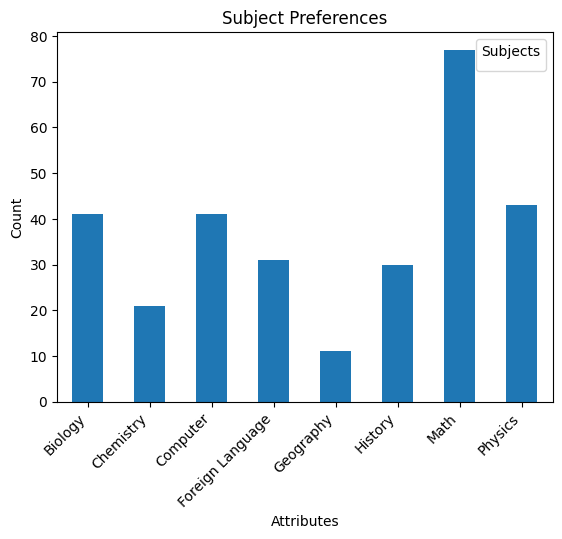

In [20]:
subject_preferences = x.iloc[:, -8:]  # Select subject columns
subject_counts = subject_preferences.sum()

subject_counts.plot(kind='bar', stacked=True)
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.title('Subject Preferences')
plt.legend(title='Subjects')
plt.xticks(rotation=45, ha='right')
plt.show()

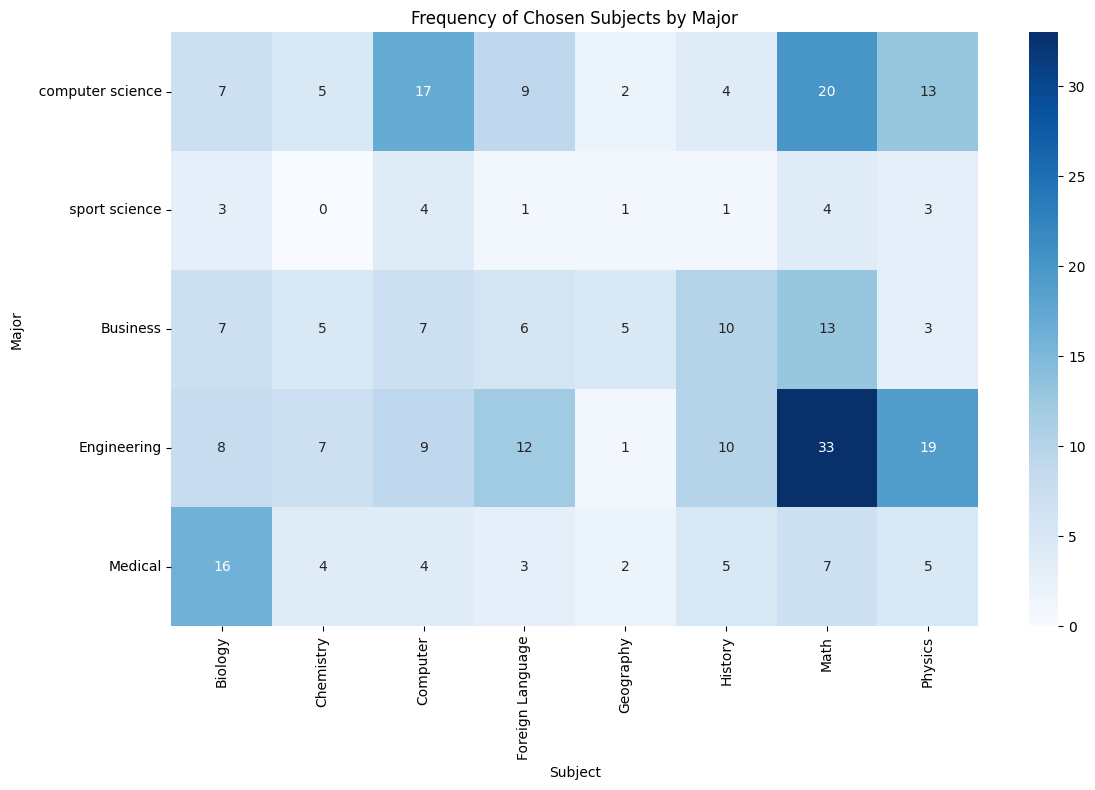

In [21]:
# Select relevant columns for the heatmap (e.g., subjects and majors)
subjects_and_majors = data[['Biology', 'Chemistry', 'Computer', 'Foreign Language',
                            'Geography', 'History', 'Math', 'Physics', 'Major(your college)']]

# Calculate the frequency of each combination of subject and major
subject_major_counts = subjects_and_majors.groupby(['Major(your college)']).sum()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subject_major_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Frequency of Chosen Subjects by Major')
plt.xlabel('Subject')
plt.ylabel('Major')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Get unique majors and their counts
major_counts = data['Major(your college)'].value_counts()
majors = major_counts.index
counts = major_counts.values


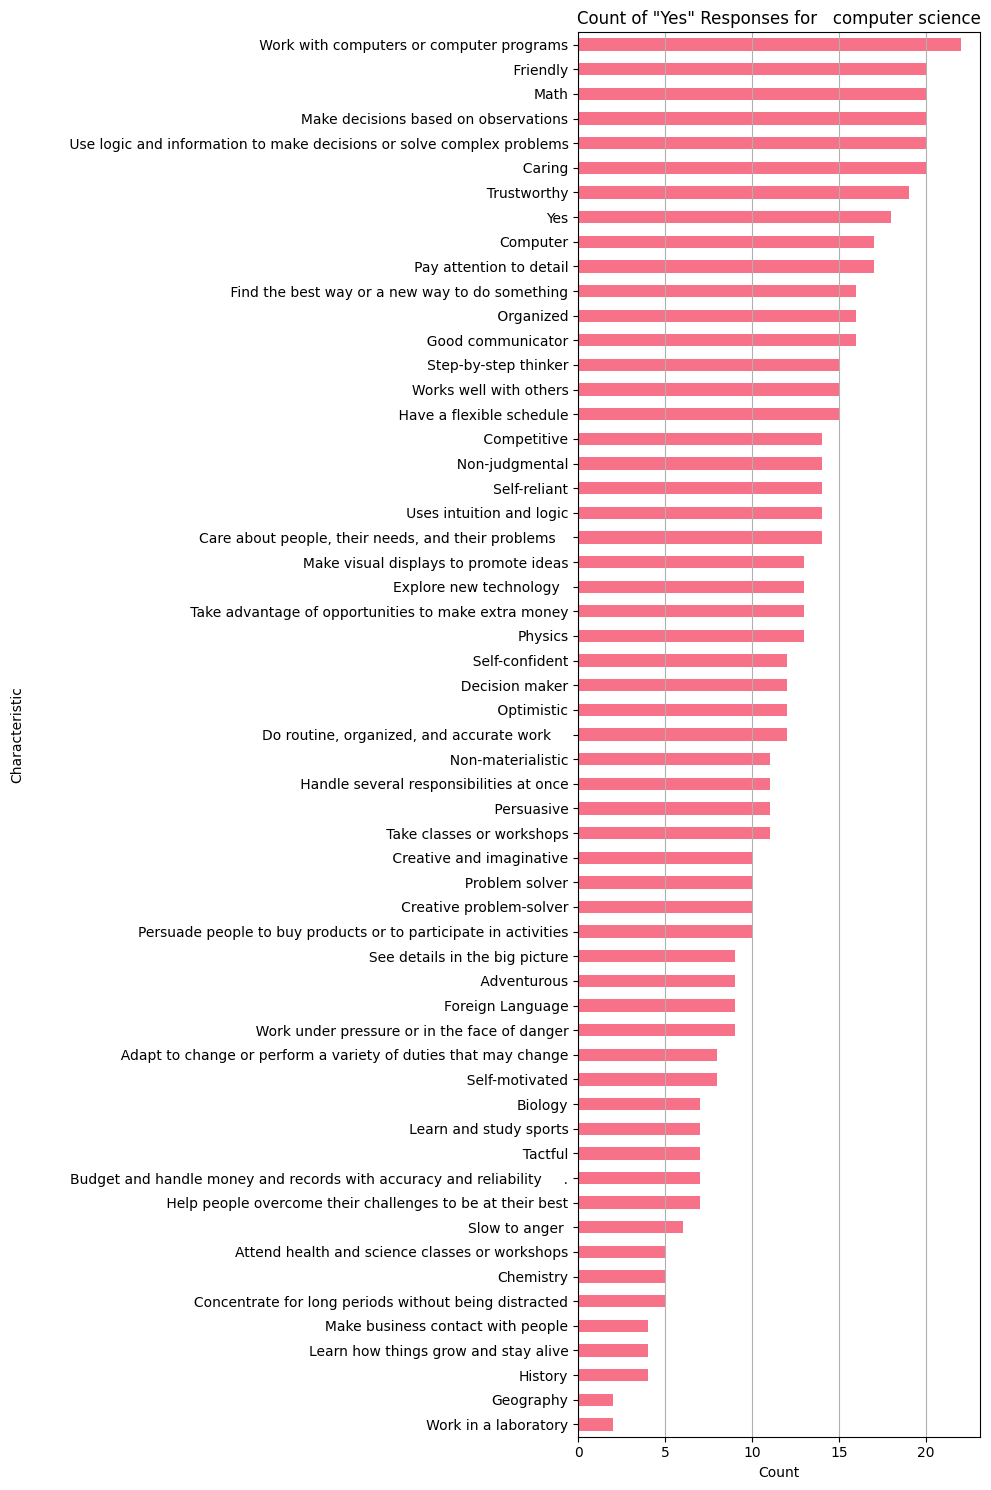

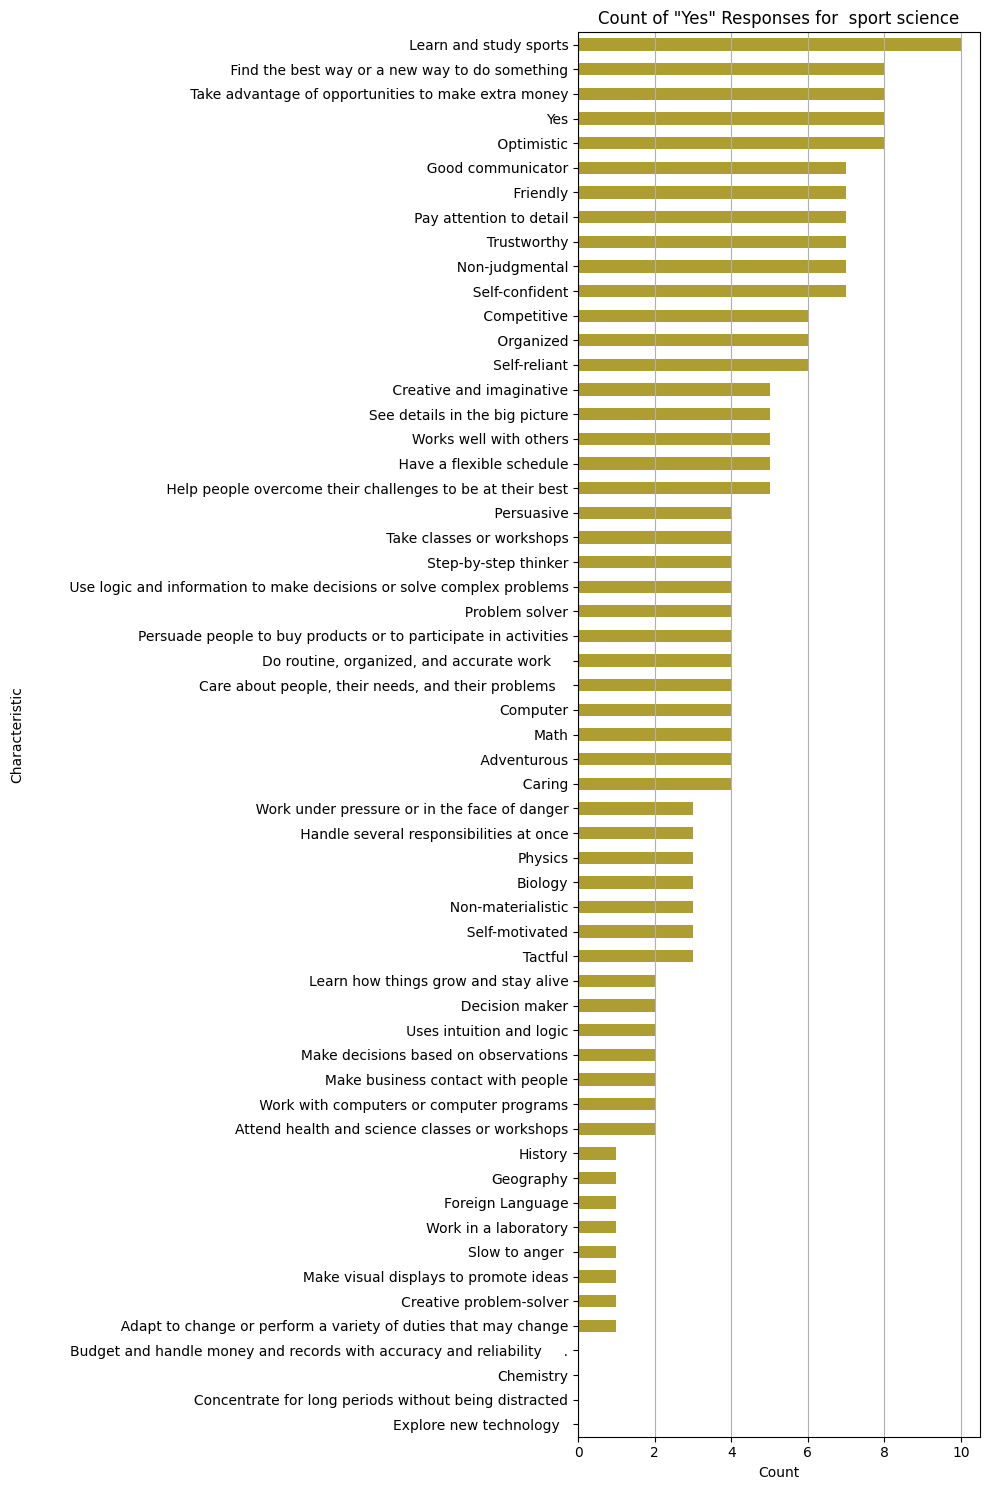

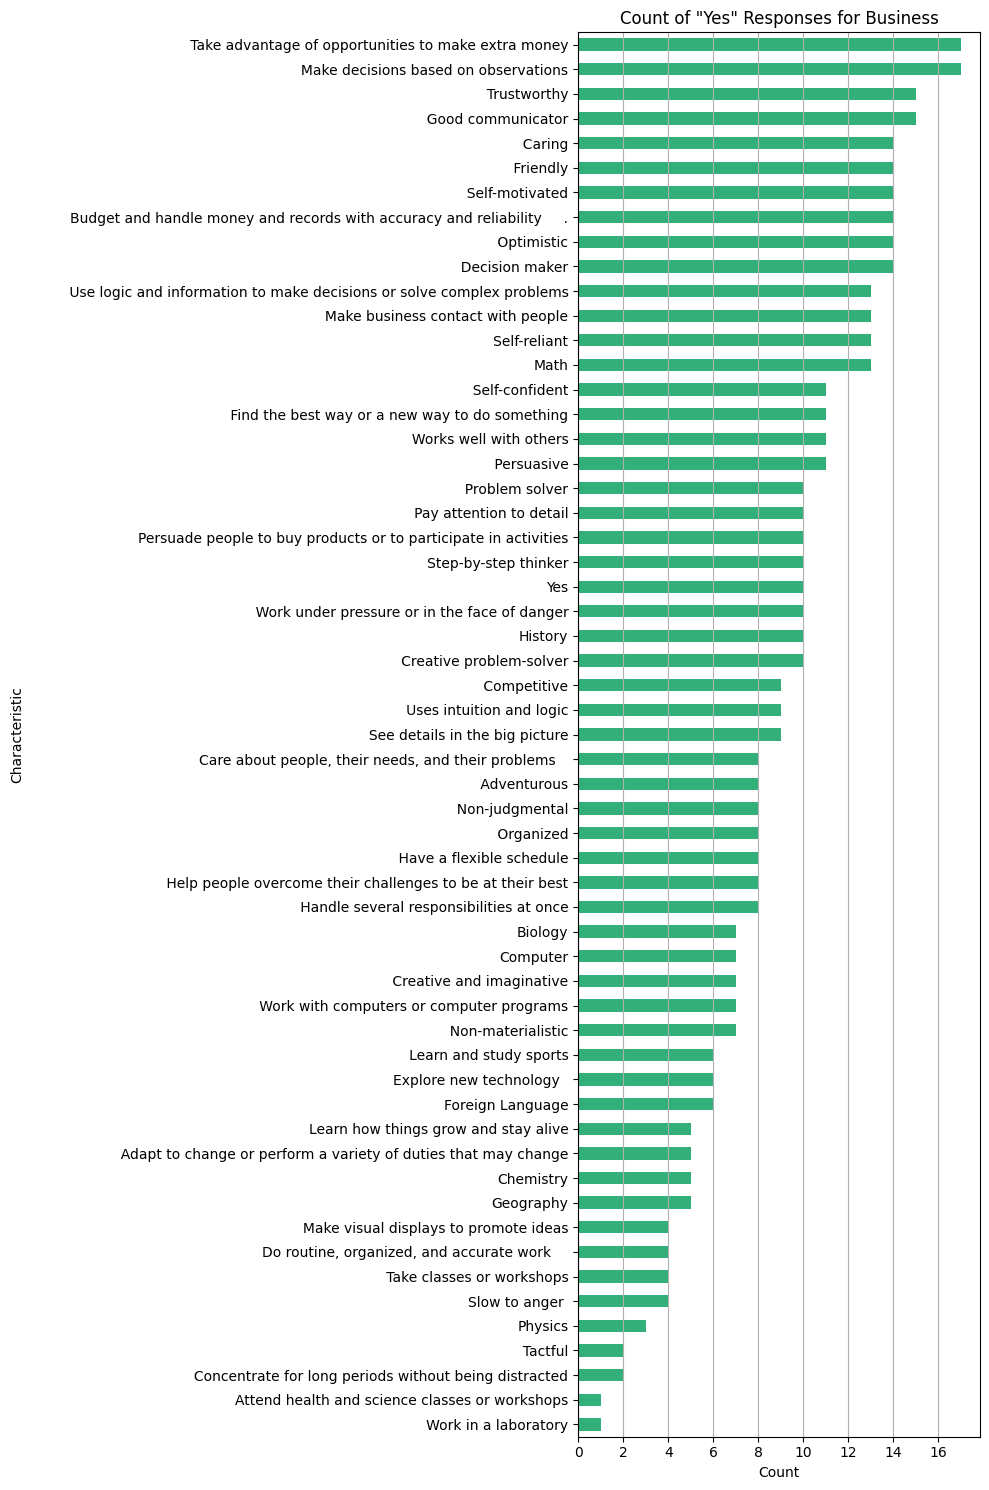

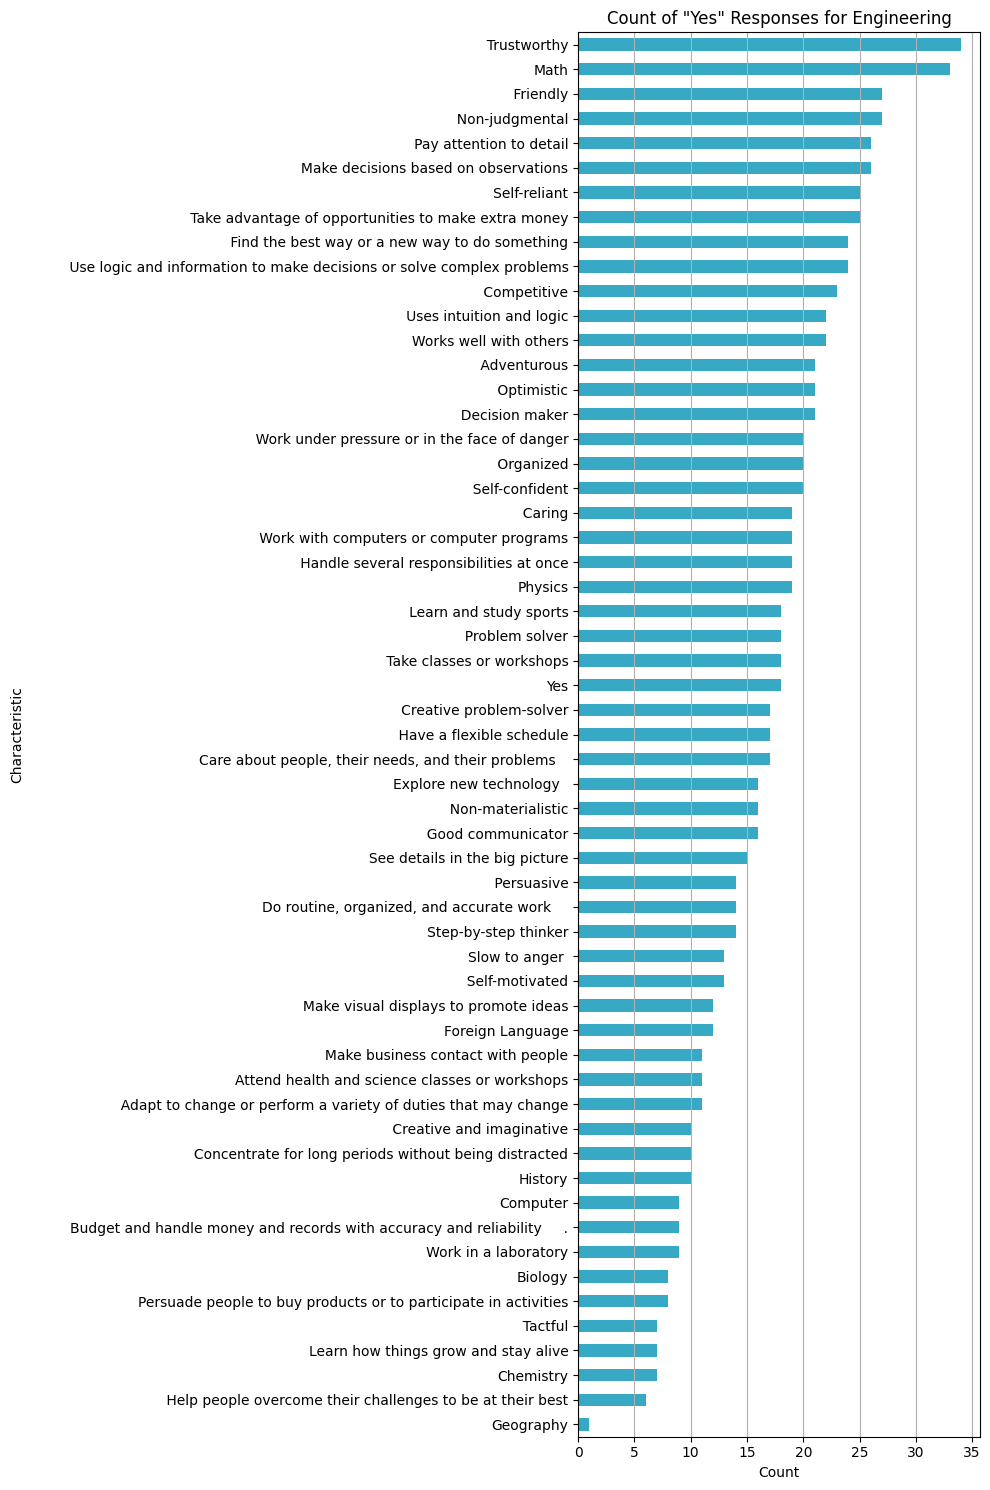

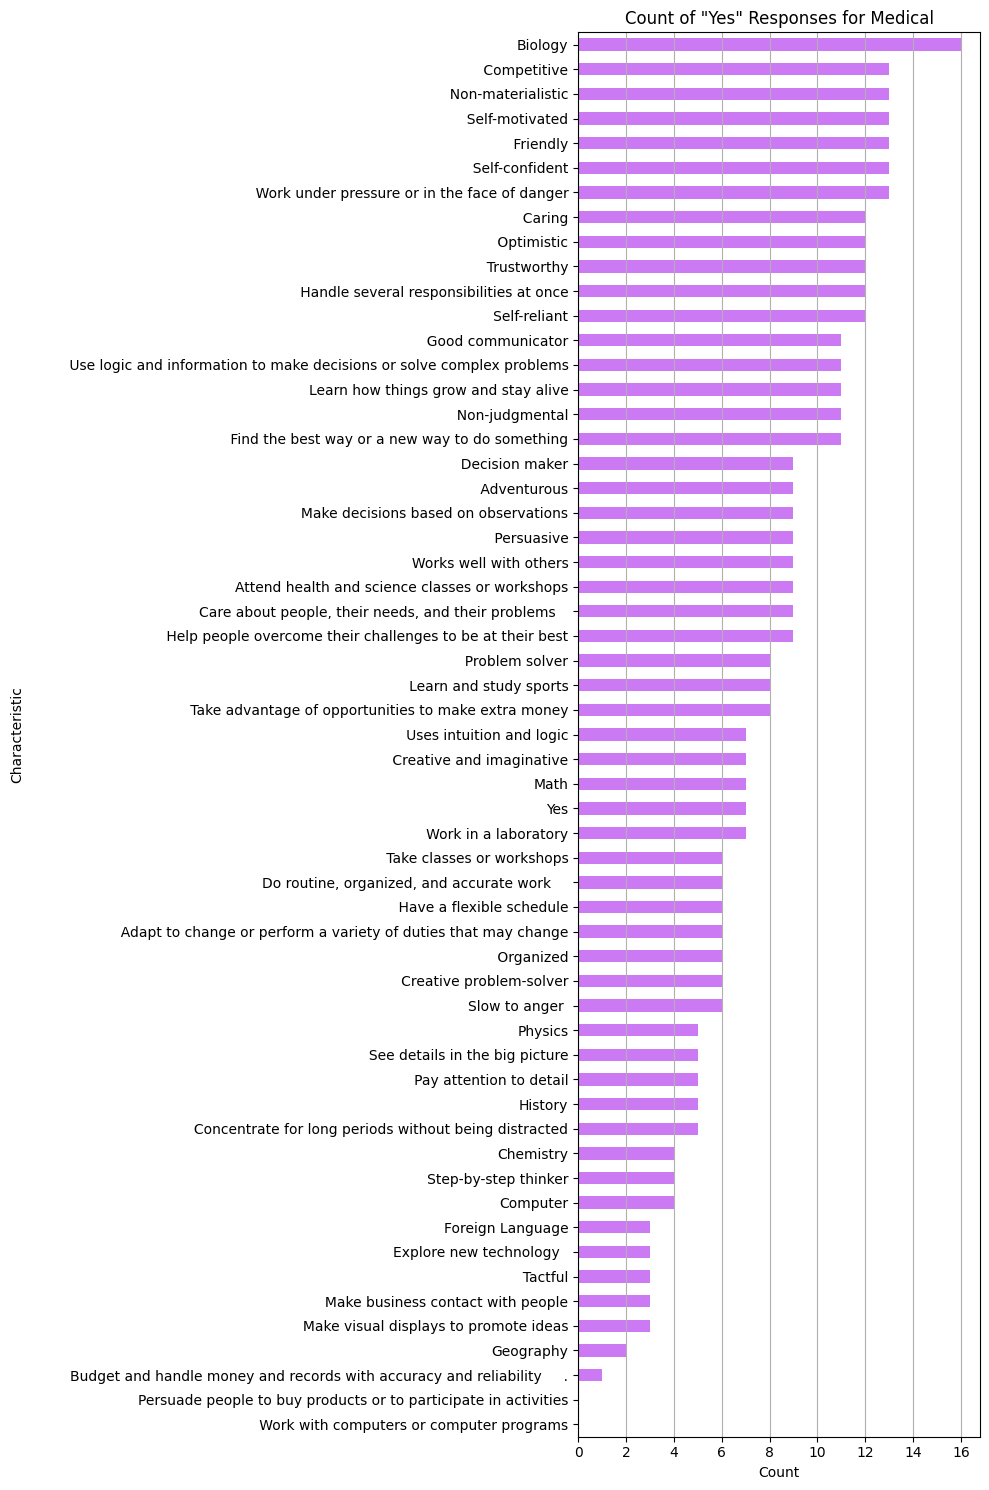

In [23]:
# Define a custom color palette with unique colors for each major
custom_palette = sns.color_palette("husl", n_colors=len(data2['Major(your college)'].unique()))

# Group by 'Major(your college)' and calculate the count of "Yes" responses for each characteristic
grouped_counts = data2.groupby('Major(your college)').sum()

# Plotting the bar chart for each major with unique colors
for i, (major, counts) in enumerate(grouped_counts.iterrows(), start=1):
    plt.figure(figsize=(10, 15))
    counts.sort_values().plot(kind='barh', color=[custom_palette[i - 1]])
    plt.title(f'Count of "Yes" Responses for {major}')
    plt.xlabel('Count')
    plt.ylabel('Characteristic')
    plt.grid(axis='x')  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()

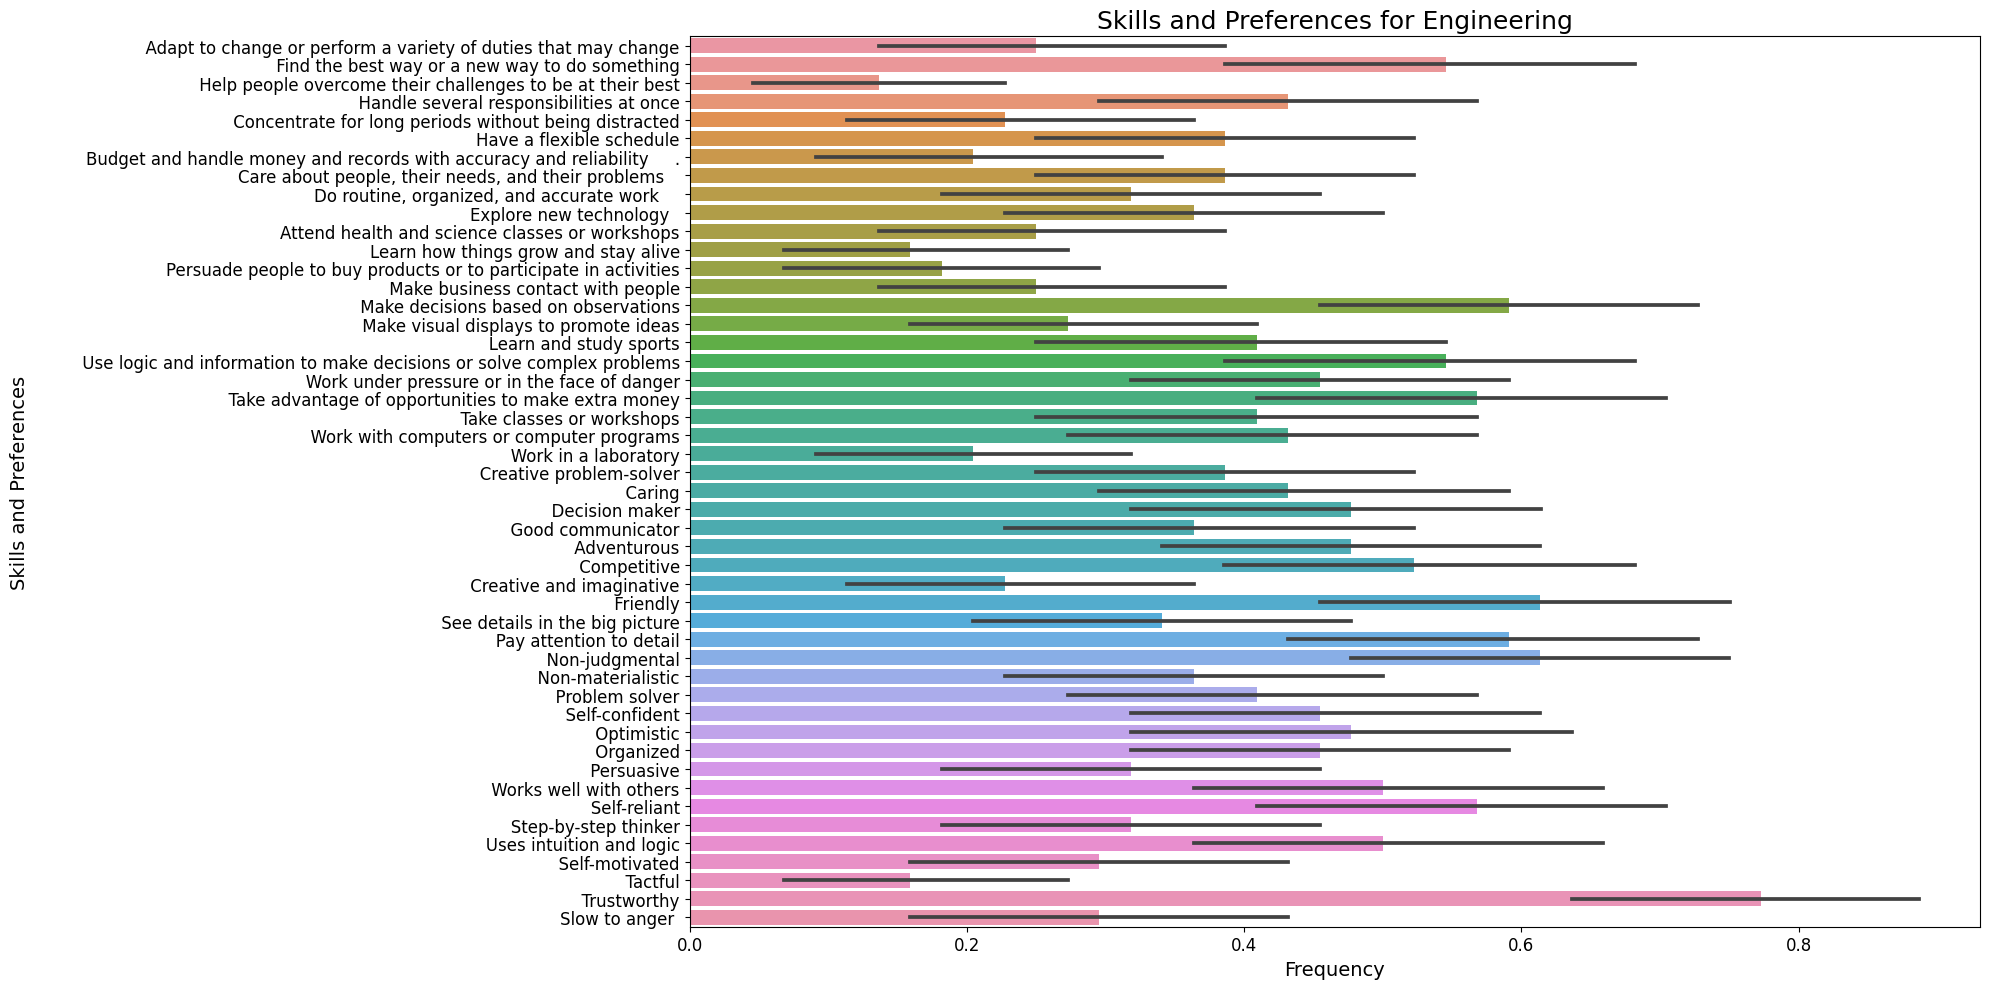

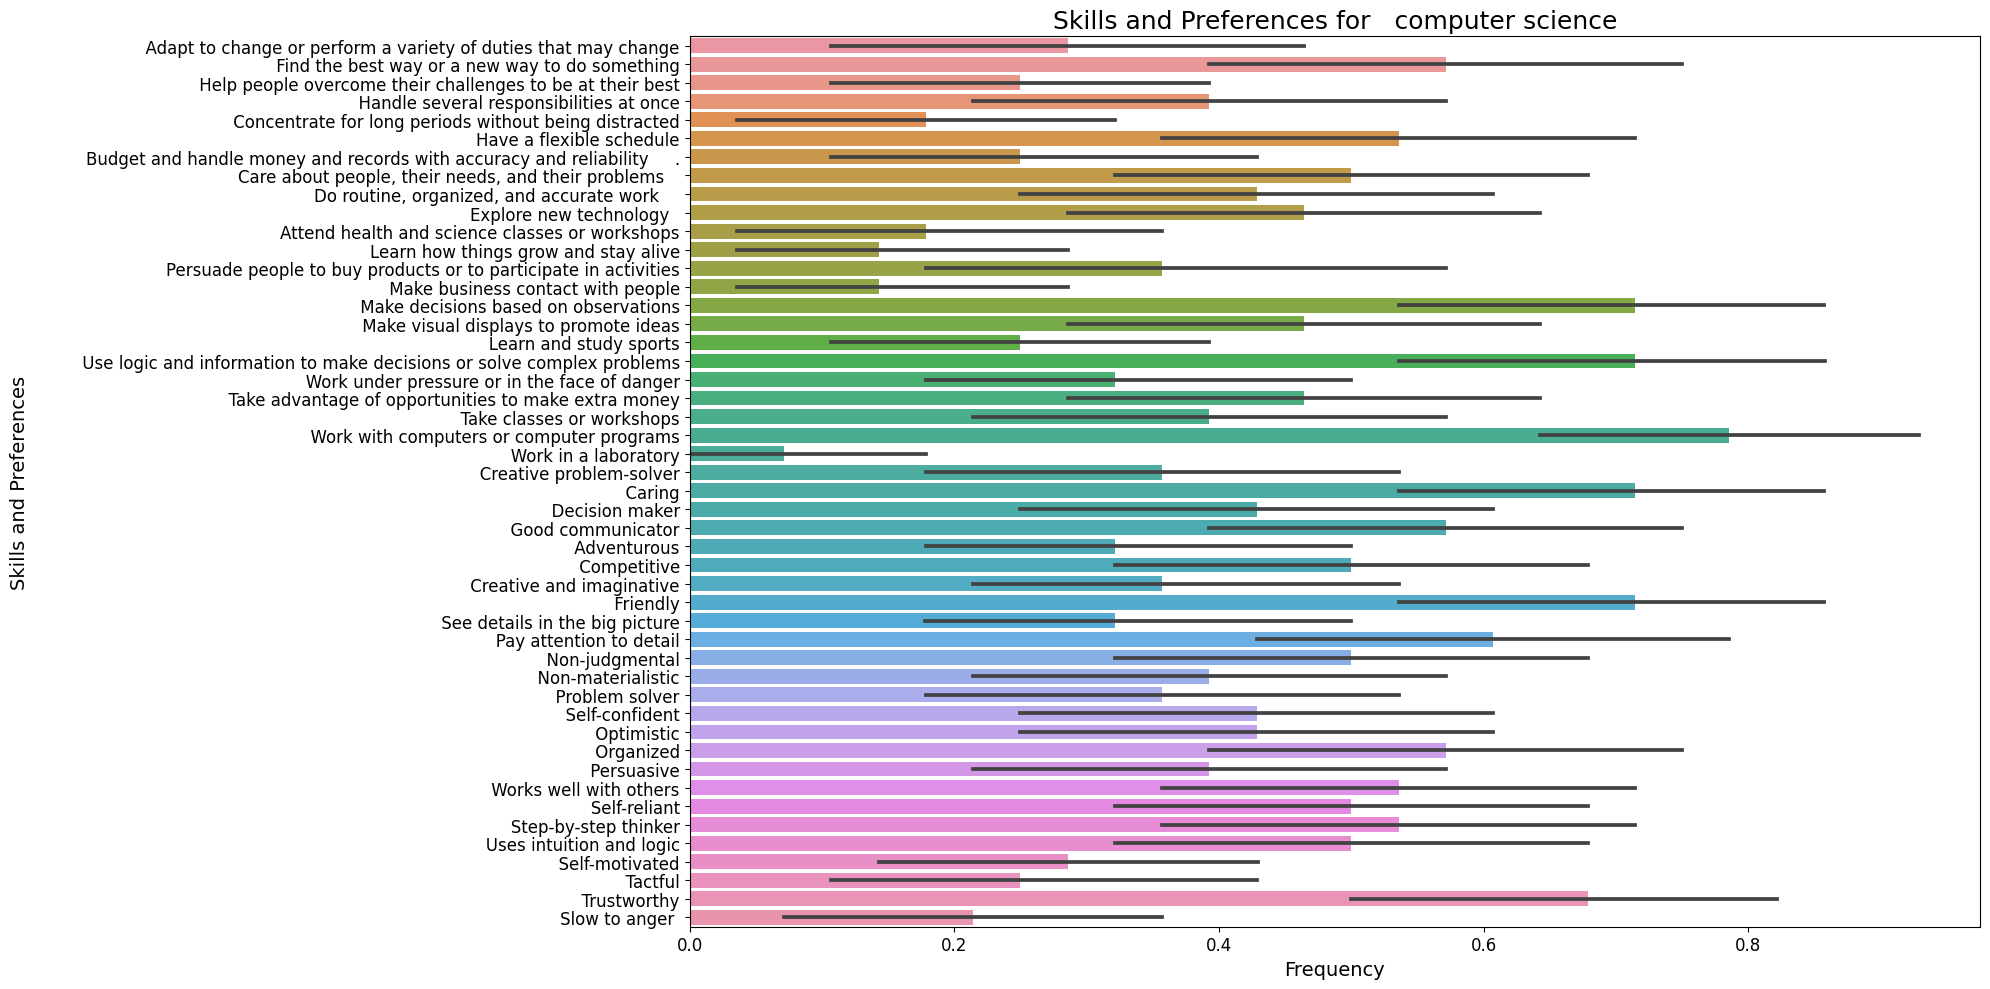

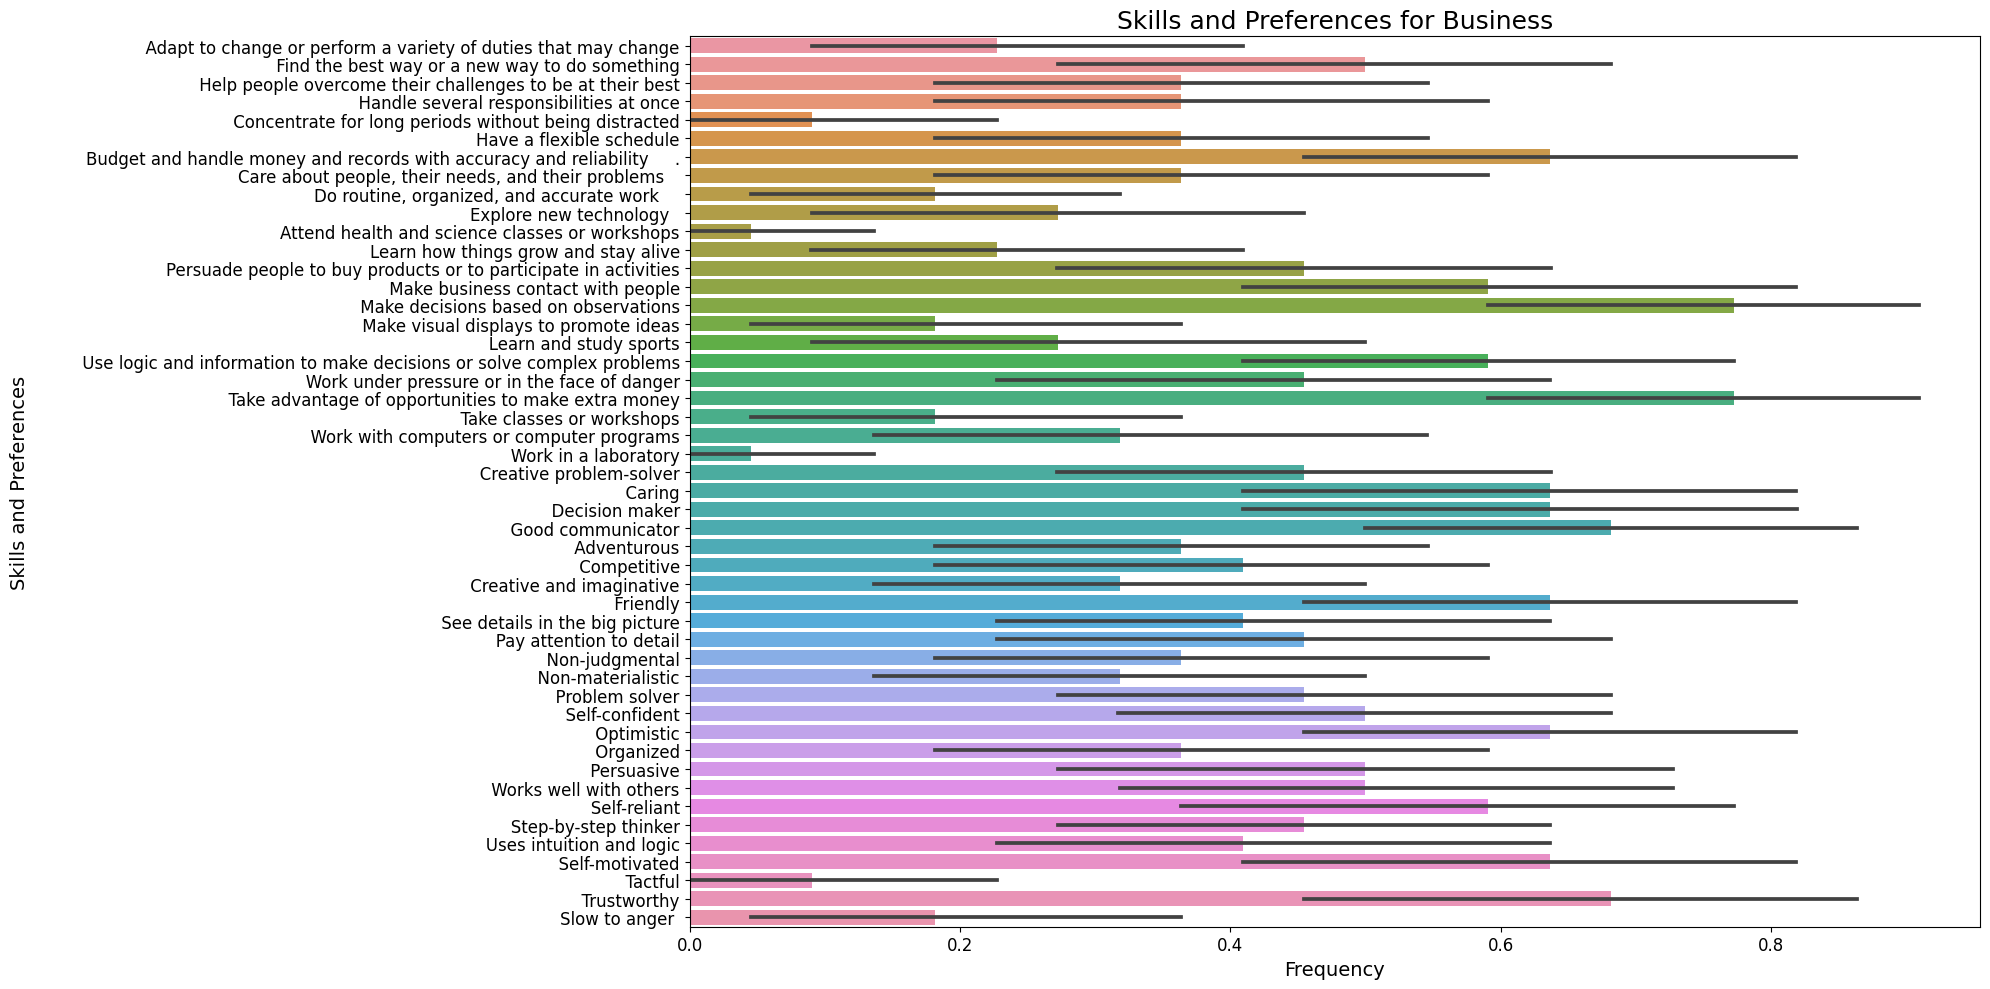

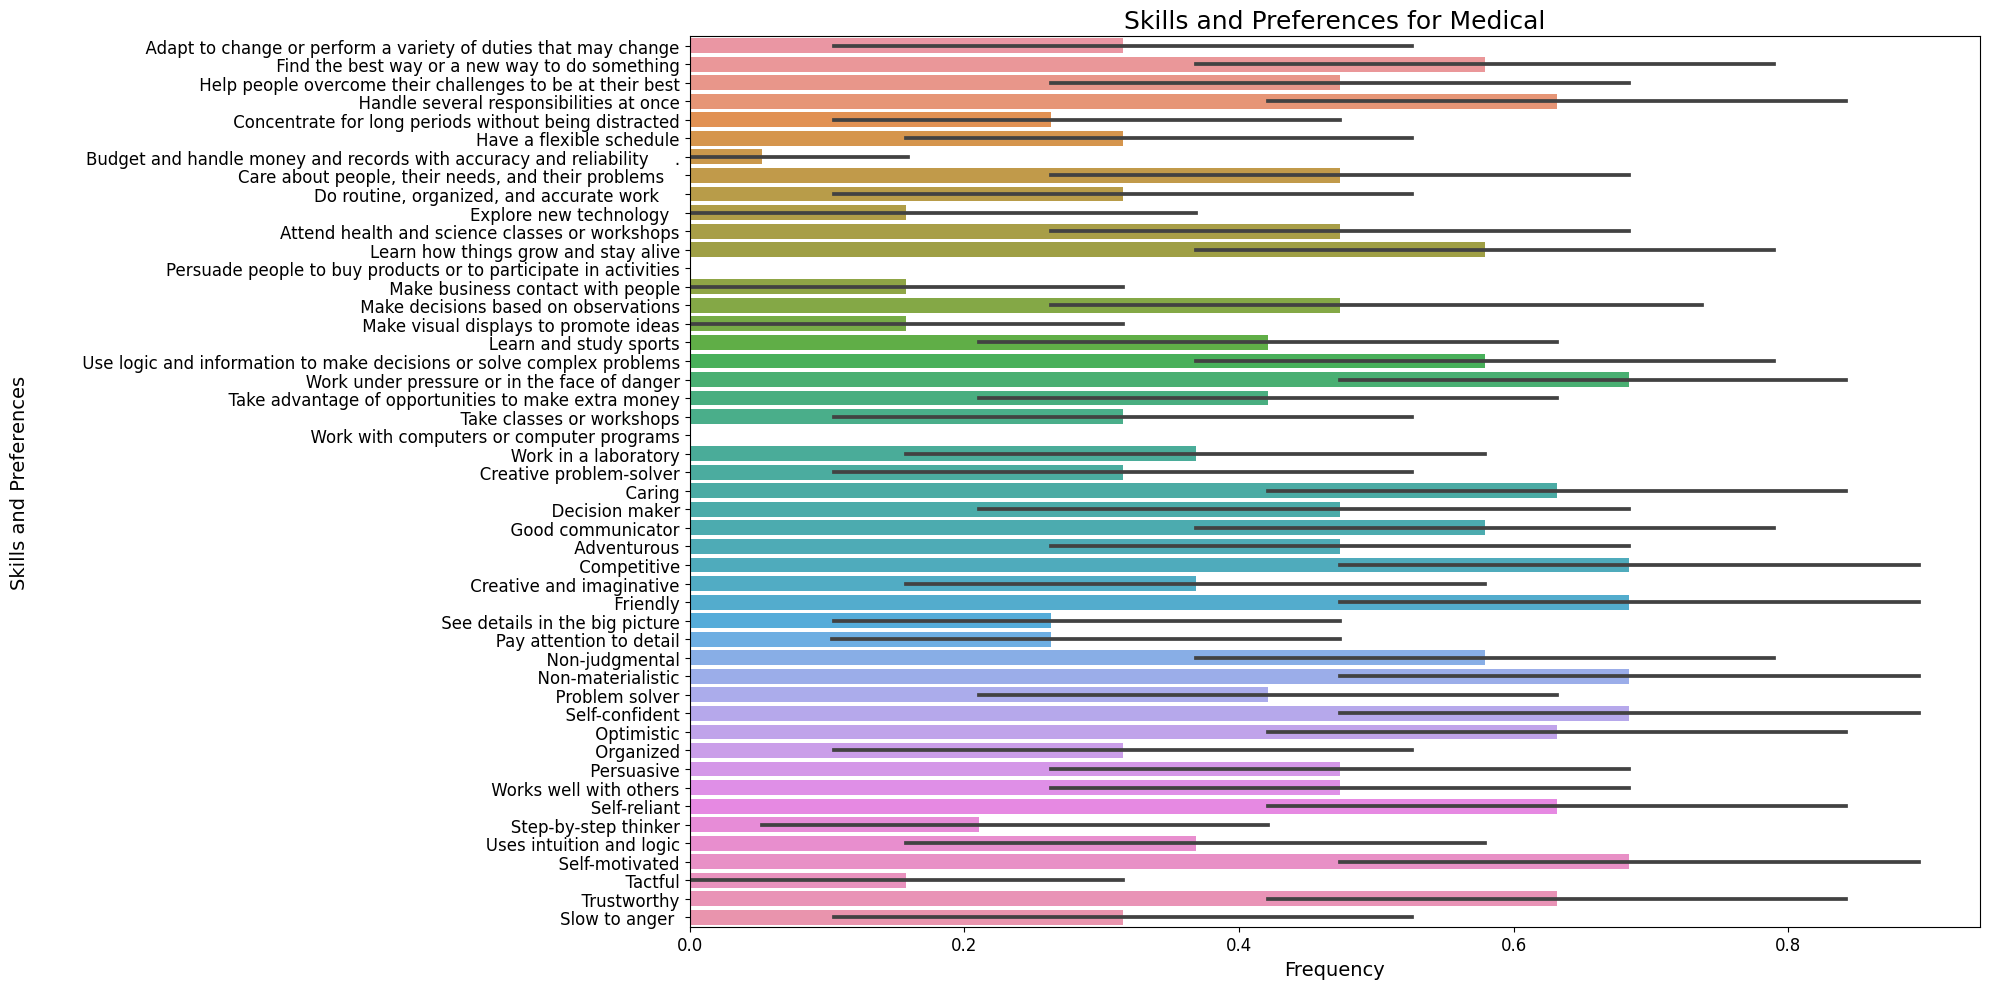

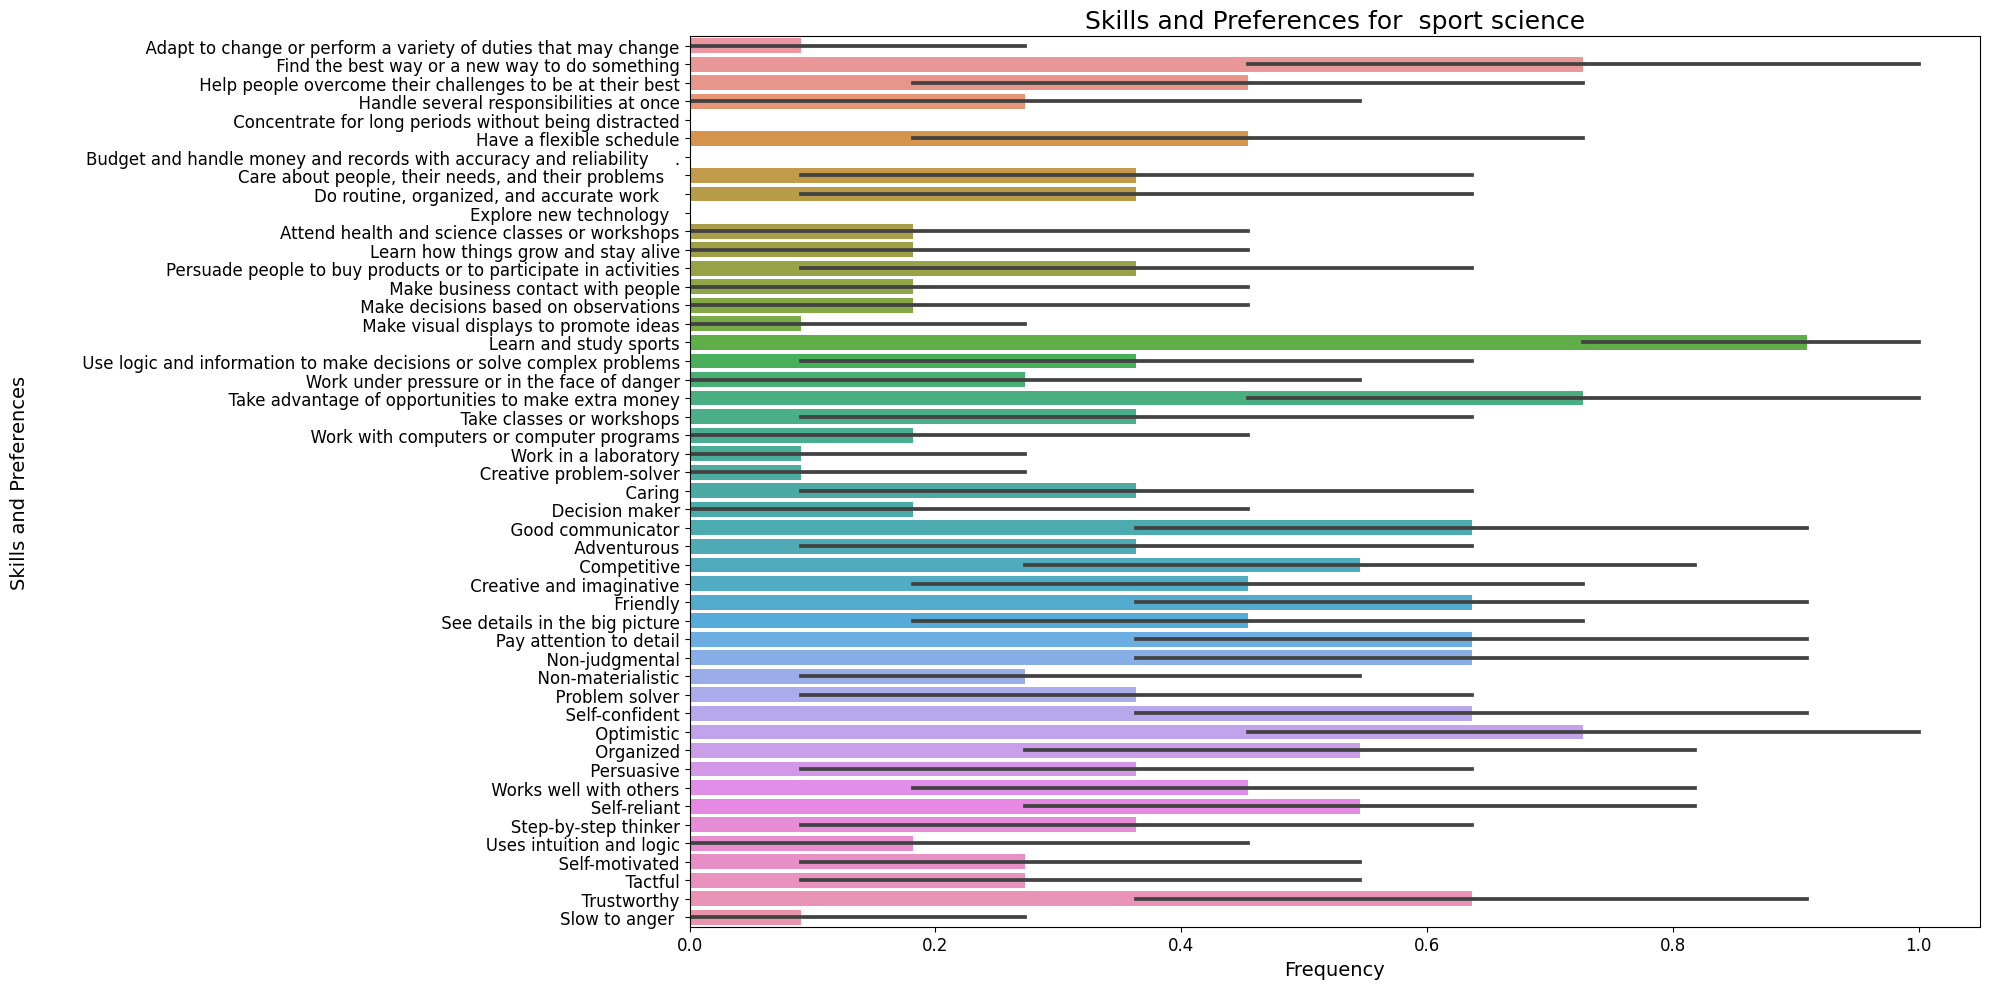

In [24]:
# Create plots for each major
for major in majors:
    major_data = data[data['Major(your college)'] == major]
    
    # Create detailed and large bar plot for the major's skills and preferences
    plt.figure(figsize=(20, 10))
    sns.barplot(data=major_data.iloc[:, :-10], orient='h')
    plt.title(f'Skills and Preferences for {major}', fontsize=18)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Skills and Preferences', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [25]:
# Create a dictionary to store the most frequent attributes, count, and percentage for each major
major_frequent_attributes = {}

# Loop through each major
for major in majors:
    major_data = data[data['Major(your college)'] == major]
    
    # Get the sum of each attribute for the major
    attribute_sums = major_data.iloc[:, :-10].sum()
    
    # Calculate the percentage of each attribute
    total_students = len(major_data)
    attribute_percentages = (attribute_sums / total_students) * 100
    
    # Sort attributes by frequency in descending order
    sorted_attributes = attribute_sums.sort_values(ascending=False)
    
    # Get the top 5 most frequent attributes
    top_attributes = sorted_attributes.head(5)
    
    # Get the count of students for this major
    major_count = major_counts[major]
    
    # Store the top attributes, count, and percentage in the dictionary
    major_frequent_attributes[major] = {'Top Attributes': top_attributes, 'Count': major_count, 'Attribute Percentages': attribute_percentages}

# Print the top 5 most frequent attributes, count, and percentage for each major in a formatted way
for major, data in major_frequent_attributes.items():
    print(f"Major: {major} (Count: {data['Count']})")
    print("Top 5 Most Frequent Attributes:")
    for attribute, count in data['Top Attributes'].items():
        percentage = data['Attribute Percentages'][attribute]
        print(f"- {attribute}: {count} ({percentage:.2f}%)")
    print()


Major: Engineering (Count: 44)
Top 5 Most Frequent Attributes:
-   Trustworthy: 34 (77.27%)
-   Non-judgmental: 27 (61.36%)
-  Friendly: 27 (61.36%)
-    Pay attention to detail: 26 (59.09%)
-      Make decisions based on observations: 26 (59.09%)

Major:   computer science (Count: 28)
Top 5 Most Frequent Attributes:
-       Work with computers or computer programs: 22 (78.57%)
-  Friendly: 20 (71.43%)
-          Use logic and information to make decisions or solve complex problems: 20 (71.43%)
-      Make decisions based on observations: 20 (71.43%)
-   Caring: 20 (71.43%)

Major: Business (Count: 22)
Top 5 Most Frequent Attributes:
-       Take advantage of opportunities to make extra money: 17 (77.27%)
-      Make decisions based on observations: 17 (77.27%)
-   Good communicator: 15 (68.18%)
-   Trustworthy: 15 (68.18%)
-   Self-motivated: 14 (63.64%)

Major: Medical (Count: 19)
Top 5 Most Frequent Attributes:
-  Friendly: 13 (68.42%)
-  Competitive: 13 (68.42%)
-   Non-materialist

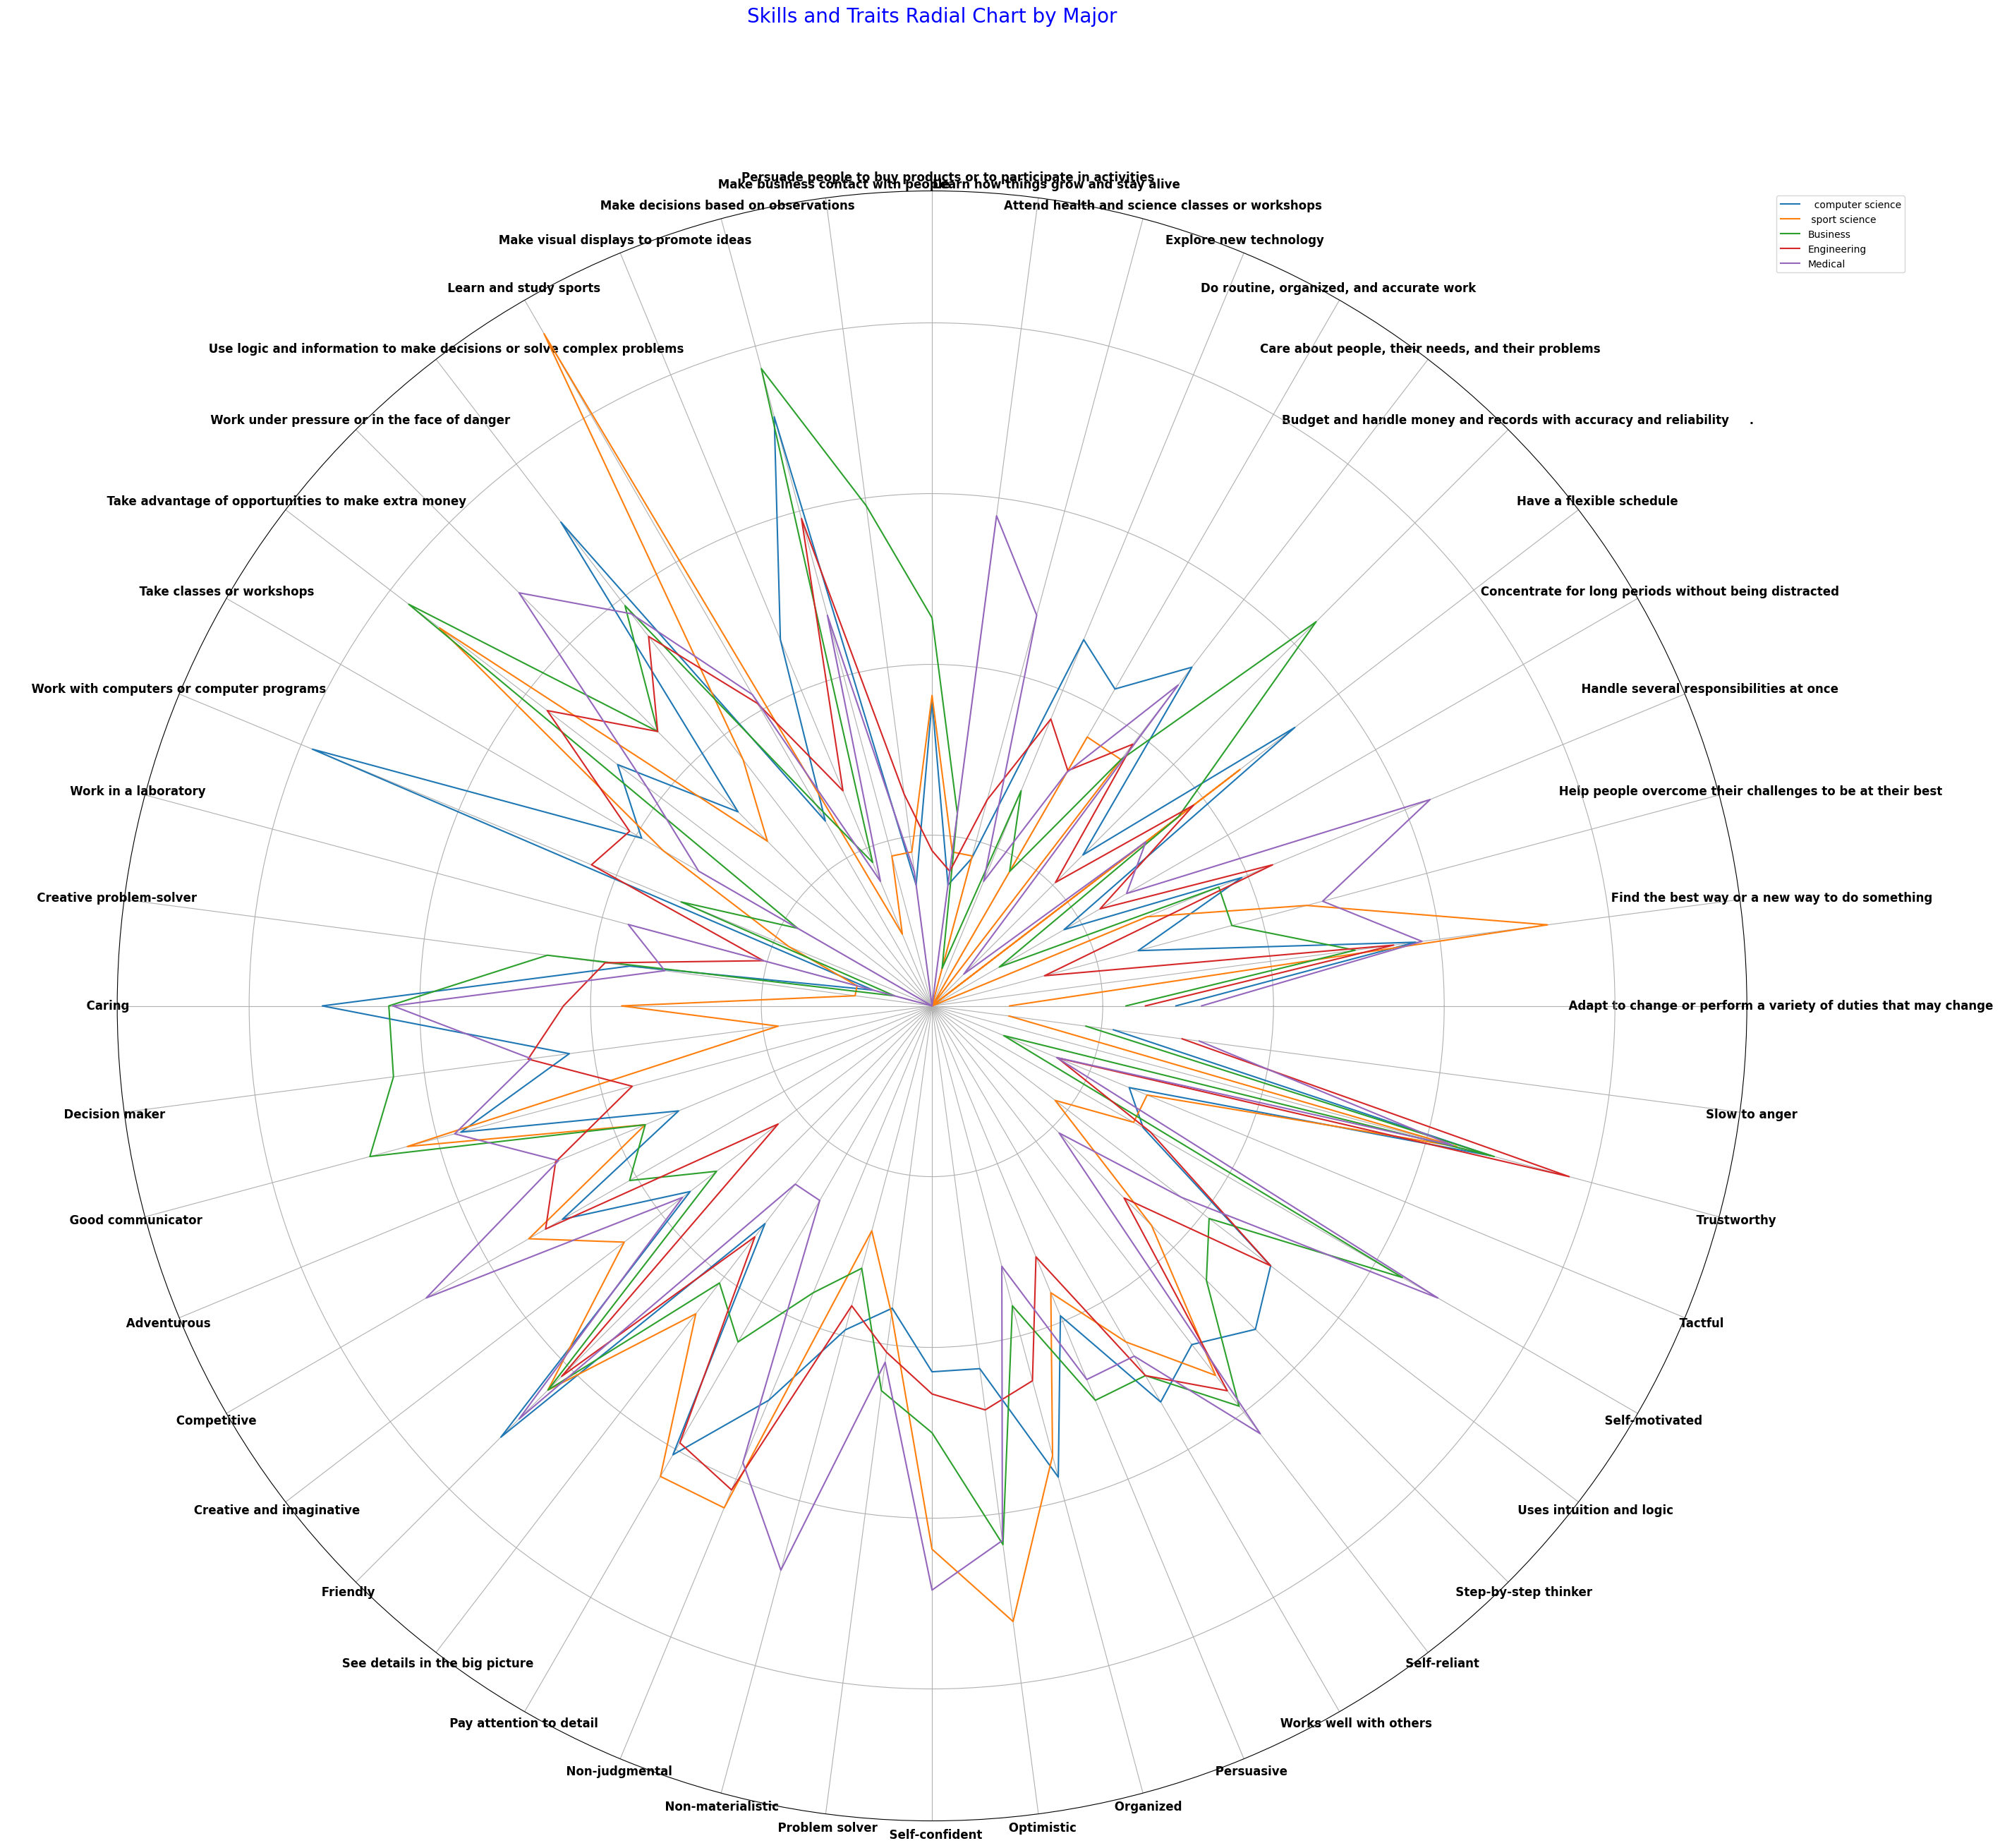

In [26]:
# Select skills, traits, and major columns
skills_traits_majors = data2.iloc[:, :-10]

skills_traits_majors = pd.merge(skills_traits_majors, y, left_index=True, right_index=True)

# Calculate mean values for each skill/trait by major
mean_values_by_major = skills_traits_majors.groupby(['Major(your college)']).mean()

# Define attributes and their values for the radial chart
attributes = mean_values_by_major.columns.tolist()
majors = mean_values_by_major.index.tolist()
values = mean_values_by_major.values

angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()

# Plotting the radial chart
fig, ax = plt.subplots(figsize=(30, 30), subplot_kw=dict(polar=True))
for i in range(len(majors)):
    ax.plot(angles, values[i], label=majors[i])

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(attributes, fontsize=12, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.title('Skills and Traits Radial Chart by Major', size=20, color='blue', y=1.1)
plt.show()


Highly Correlated Features:
set()


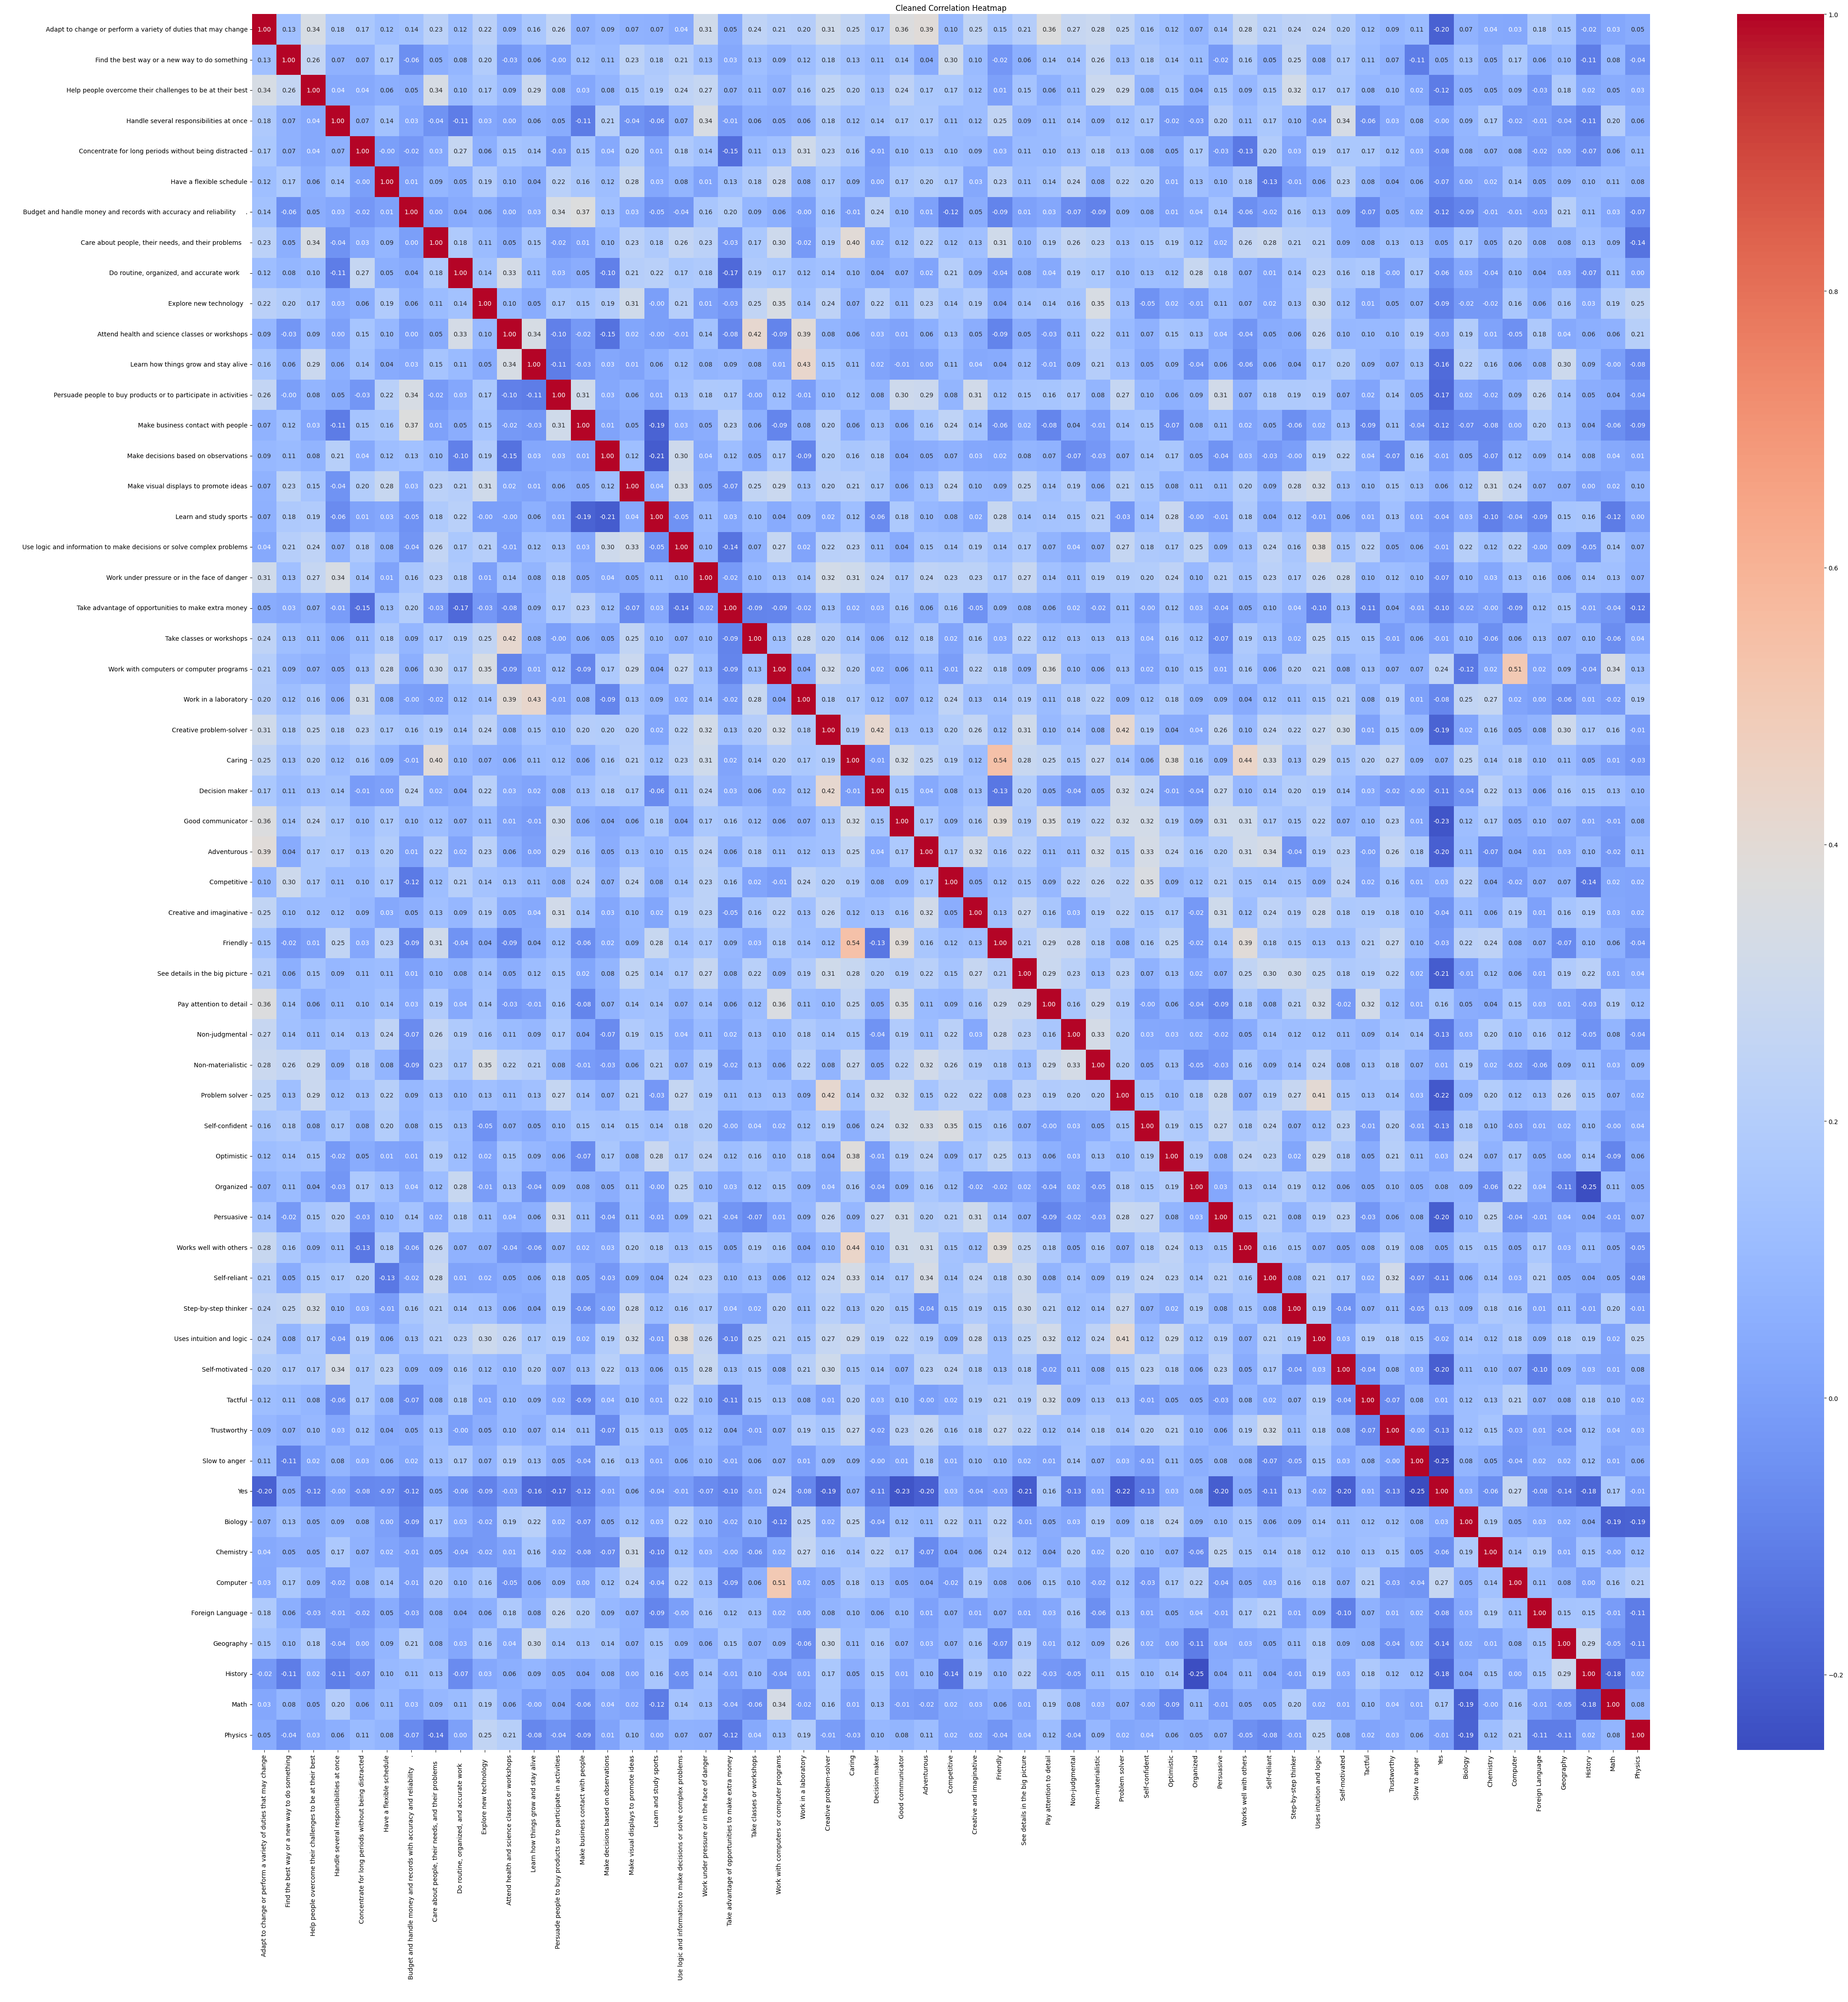

In [27]:
# Assuming 'x' is your DataFrame
correlation_matrix = x.corr()

# Set the threshold for high correlation
threshold = 0.7

# Find pairs of highly correlated features
high_corr_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Extract the names of highly correlated features
high_corr_features = set()
for i in range(len(high_corr_pairs.columns)):
    for j in range(i):
        if high_corr_pairs.iloc[i, j]:
            colname = high_corr_pairs.columns[i]
            high_corr_features.add(colname)

# Print the highly correlated features
print("Highly Correlated Features:")
print(high_corr_features)

# Plot the correlation heatmap for the cleaned data
plt.figure(figsize=(50, 50))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cleaned Correlation Heatmap')
plt.show()

# ENCODING & TRAINING

In [28]:
# 0 computer science
# 1 sport science
# 2 business
# 3 engineering
# 4 medical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 2,
       3, 0, 0, 4, 1, 2, 3, 0, 4, 2, 3, 1, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 2, 4, 1, 2, 2, 4, 4, 4, 4, 2, 1, 4, 1, 2, 3, 1, 3, 2, 4, 2, 4,
       0, 2, 3, 3, 3, 0, 2, 3, 3, 2, 2, 0, 0, 3, 0, 2, 3, 2, 2, 4, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 4, 0, 2, 4, 0, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 0, 4, 3])

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [81]:
# Define the Leaky ReLU activation with alpha parameter
leaky_relu = layers.LeakyReLU(alpha=0.1)

# Define the L2 regularization parameter
l2_reg = 0.01  # You can adjust this value based on the level of regularization needed

# Define the model with L2 regularization
model = models.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer=l2(l2_reg), input_shape=(X_train.shape[1],)),
    layers.Dense(265, activation='relu', kernel_regularizer=l2(l2_reg)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(l2_reg)),
    layers.Dense(32, activation='relu',kernel_regularizer=l2(l2_reg)),
    layers.Dense(16, activation='relu', kernel_regularizer=l2(l2_reg)),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model with initial learning rate
initial_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [82]:
# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with learning rate scheduler
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

Epoch 1/35
3/3 [==============================] - 1s 92ms/step - loss: 8.4432 - accuracy: 0.1910 - val_loss: 8.0928 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/35
3/3 [==============================] - 0s 16ms/step - loss: 7.9363 - accuracy: 0.2472 - val_loss: 7.6344 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/35
3/3 [==============================] - 0s 16ms/step - loss: 7.4607 - accuracy: 0.2921 - val_loss: 7.2104 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/35
3/3 [==============================] - 0s 16ms/step - loss: 7.0143 - accuracy: 0.3820 - val_loss: 6.7968 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 5/35
3/3 [==============================] - 0s 16ms/step - loss: 6.5830 - accuracy: 0.4157 - val_loss: 6.4224 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 6/35
3/3 [==============================] - 0s 16ms/step - loss: 6.1840 - accuracy: 0.3708 - val_loss: 6.0649 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 7/35
3/3 [==============================] - 0s 16ms/step - loss: 5.7969 - accuracy

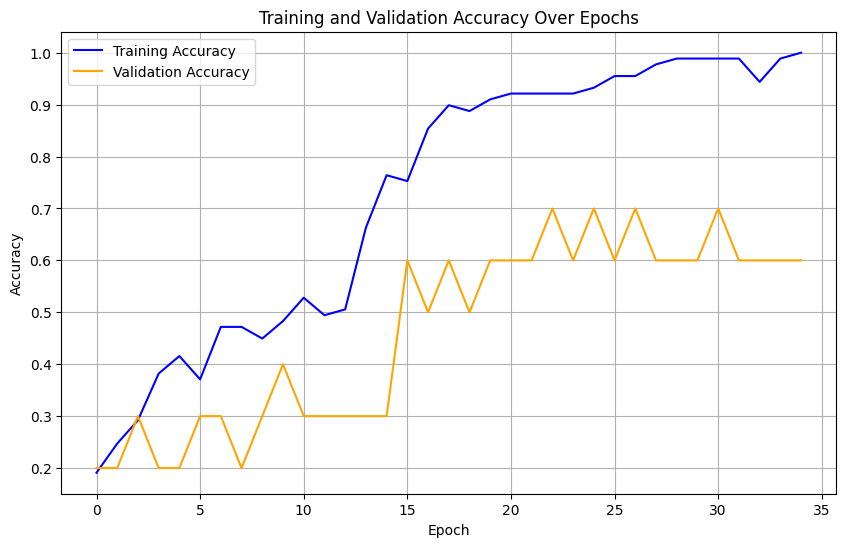

In [83]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Accuracy:", accuracy)


# Calculate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate other metrics like precision, recall, and F1-score using scikit-learn
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

Neural Network Accuracy: 0.4399999976158142
1/1 [==============================] - 0s 64ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.00      0.00      0.00         3
           2       0.20      0.33      0.25         3
           3       0.50      0.71      0.59         7
           4       0.50      0.67      0.57         3

    accuracy                           0.44        25
   macro avg       0.34      0.41      0.36        25
weighted avg       0.40      0.44      0.41        25



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [85]:
#save_model(model, r"D:\mazen FCDS\FCDS\Ai platforms\Project\model_career.h5")

In [86]:
# Initialize and train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(naive_bayes, r"D:\mazen FCDS\FCDS\Ai platforms\Project\naive_bayes_model.pkl")

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy2:.2f}')

# Generate a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.00      0.00      0.00         3
           2       0.50      0.33      0.40         3
           3       0.46      0.86      0.60         7
           4       0.60      1.00      0.75         3

    accuracy                           0.52        25
   macro avg       0.43      0.50      0.44        25
weighted avg       0.48      0.52      0.46        25



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [87]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=56)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy3:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.44

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.00      0.00      0.00         3
           2       1.00      0.33      0.50         3
           3       0.33      0.71      0.45         7
           4       0.50      0.67      0.57         3

    accuracy                           0.44        25
   macro avg       0.52      0.41      0.40        25
weighted avg       0.54      0.44      0.42        25

